<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Proyek Akhir: NBA**

###**Teman Icis**
</center>

### **Anggota Kelompok:**
1. 2006473421 - Mohammad Rizky Chairul Azizi
2. 2006484596 - Zeta Prawira Syah
3. 2006486001 - Syahdan Putra Adriatama
4. 2006530141 - Rakha Rayhan Nusyura

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mvps_dir = '/content/drive/My Drive/Teman Icis/Datasets/mvps.csv'
nicknames_dir = '/content/drive/My Drive/Teman Icis/Datasets/nicknames.csv'
player_mvp_stats_dir = '/content/drive/My Drive/Teman Icis/Datasets/player_mvp_stats.csv'
players_dir = '/content/drive/My Drive/Teman Icis/Datasets/players.csv'
salaries_dir = '/content/drive/My Drive/Teman Icis/Datasets/salaries.csv'
teams_dir = '/content/drive/My Drive/Teman Icis/Datasets/teams.csv'

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt

# **Pre-processing**

## 1. Deskripsi setiap atribut pada tiap dataframe



### a) mvps.csv

In [ ]:
mvps_df = pd.read_csv(mvps_dir, sep=";")
mvps_df.head(10)

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77,891,960,928.00,82,37.0,...,6.0,5.5,2.7,1.0,539.00,312.00,851.00,20.3,321.00,1991
1,2,Magic Johnson,31,LAL,10,497,960,518.00,79,37.1,...,7.0,12.5,1.3,0.2,477.00,0.32,906.00,15.4,251.00,1991
2,3,David Robinson,25,SAS,6,476,960,496.00,82,37.7,...,13.0,2.5,1.5,3.9,552.00,143.00,762.00,17.0,264.00,1991
3,4,Charles Barkley,27,PHI,2,222,960,231.00,67,37.3,...,10.1,4.2,1.6,0.5,0.57,284.00,722.00,13.4,258.00,1991
4,5,Karl Malone,27,UTA,0,142,960,148.00,82,40.3,...,11.8,3.3,1.1,1.0,527.00,286.00,0.77,15.5,225.00,1991
5,6,Clyde Drexler,28,POR,1,75,960,78.00,82,34.8,...,6.7,6.0,1.8,0.7,482.00,319.00,794.00,12.4,209.00,1991
6,7,Kevin Johnson,24,PHO,0,32,960,33.00,77,36.0,...,3.5,10.1,2.1,0.1,516.00,205.00,843.00,12.7,0.22,1991
7,8,Dominique Wilkins,31,ATL,0,29,960,0.03,81,38.0,...,9.0,3.3,1.5,0.8,0.47,341.00,829.00,11.4,177.00,1991
8,9T,Larry Bird,34,BOS,0,25,960,26.00,60,38.0,...,8.5,7.2,1.8,1.0,454.00,389.00,891.00,6.6,0.14,1991
9,9T,Terry Porter,27,POR,0,25,960,26.00,81,32.9,...,3.5,8.0,2.0,0.1,515.00,415.00,823.00,13.0,235.00,1991


In [ ]:
mvps_df.columns

Index(['Rank', 'Player', 'Age', 'Tm', 'First', 'Pts Won', 'Pts Max', 'Share',
       'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS',
       'WS/48', 'Year'],
      dtype='object')

In [ ]:
mvps_df[pd.to_numeric(mvps_df["Rank"], errors='coerce').isnull()]

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
8,9T,Larry Bird,34,BOS,0,25,960,26.0,60,38.0,...,8.5,7.2,1.8,1.0,454.00,389.0,891.0,6.6,0.14,1991
9,9T,Terry Porter,27,POR,0,25,960,26.0,81,32.9,...,3.5,8.0,2.0,0.1,515.00,415.0,823.0,13.0,235.00,1991
18,19T,Tim Hardaway,24,GSW,0,1,960,1.0,82,39.2,...,4.0,9.7,2.6,0.1,476.00,385.0,803.0,9.9,148.00,1991
19,19T,Kevin McHale,33,BOS,0,1,960,1.0,68,30.4,...,7.1,1.9,0.4,2.1,553.00,405.0,829.0,7.9,182.00,1991
31,12T,Charles Barkley,28,PHI,0,18,960,19.0,75,38.4,...,11.1,4.1,1.8,0.6,552.00,234.0,695.0,12.3,205.00,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,11T,Rudy Gobert,26,UTA,0,1,1010,1.0,81,31.8,...,12.9,2.0,0.8,2.3,669.00,0.0,636.0,14.4,268.00,2019
446,11T,LeBron James,34,LAL,0,1,1010,1.0,55,35.2,...,8.5,8.3,1.3,0.6,0.51,339.0,665.0,7.2,179.00,2019
471,13T,James Harden,31,TOT,0,1,1010,1.0,44,36.6,...,7.9,10.8,1.2,0.8,466.00,362.0,861.0,7.0,208.00,2021
472,13T,LeBron James,36,LAL,0,1,1010,1.0,45,33.4,...,7.7,7.8,1.1,0.6,513.00,365.0,698.0,5.6,179.00,2021


In [ ]:
mvps_df["Rank"] = mvps_df["Rank"].str.replace(r'\D+', '', regex=True).astype('int')

In [ ]:
mvps_df.head(20)

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77,891,960,928.00,82,37.0,...,6.0,5.5,2.7,1.0,539.00,312.00,851.00,20.3,321.00,1991
1,2,Magic Johnson,31,LAL,10,497,960,518.00,79,37.1,...,7.0,12.5,1.3,0.2,477.00,0.32,906.00,15.4,251.00,1991
2,3,David Robinson,25,SAS,6,476,960,496.00,82,37.7,...,13.0,2.5,1.5,3.9,552.00,143.00,762.00,17.0,264.00,1991
3,4,Charles Barkley,27,PHI,2,222,960,231.00,67,37.3,...,10.1,4.2,1.6,0.5,0.57,284.00,722.00,13.4,258.00,1991
4,5,Karl Malone,27,UTA,0,142,960,148.00,82,40.3,...,11.8,3.3,1.1,1.0,527.00,286.00,0.77,15.5,225.00,1991
5,6,Clyde Drexler,28,POR,1,75,960,78.00,82,34.8,...,6.7,6.0,1.8,0.7,482.00,319.00,794.00,12.4,209.00,1991
6,7,Kevin Johnson,24,PHO,0,32,960,33.00,77,36.0,...,3.5,10.1,2.1,0.1,516.00,205.00,843.00,12.7,0.22,1991
7,8,Dominique Wilkins,31,ATL,0,29,960,0.03,81,38.0,...,9.0,3.3,1.5,0.8,0.47,341.00,829.00,11.4,177.00,1991
8,9,Larry Bird,34,BOS,0,25,960,26.00,60,38.0,...,8.5,7.2,1.8,1.0,454.00,389.00,891.00,6.6,0.14,1991
9,9,Terry Porter,27,POR,0,25,960,26.00,81,32.9,...,3.5,8.0,2.0,0.1,515.00,415.00,823.00,13.0,235.00,1991


In [ ]:
mvps_df['Rank'] = pd.to_numeric(mvps_df['Rank'])

In [ ]:
mvps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     474 non-null    int64  
 1   Player   474 non-null    object 
 2   Age      474 non-null    int64  
 3   Tm       474 non-null    object 
 4   First    474 non-null    int64  
 5   Pts Won  474 non-null    int64  
 6   Pts Max  474 non-null    int64  
 7   Share    474 non-null    float64
 8   G        474 non-null    int64  
 9   MP       474 non-null    float64
 10  PTS      474 non-null    float64
 11  TRB      474 non-null    float64
 12  AST      474 non-null    float64
 13  STL      474 non-null    float64
 14  BLK      474 non-null    float64
 15  FG%      474 non-null    float64
 16  3P%      474 non-null    float64
 17  FT%      474 non-null    float64
 18  WS       474 non-null    float64
 19  WS/48    474 non-null    float64
 20  Year     474 non-null    int64  
dtypes: float64(12), 

In [ ]:
print("Num of row: " + str(mvps_df.shape[0]))
print("Num of col: " + str(mvps_df.shape[1]))

Num of row: 474
Num of col: 21


In [ ]:
mvps_df.describe(include=np.number)

,Rank,Age,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,8.120253,27.729958,7.544304,196.105485,1153.312236,151.946371,72.962025,36.405063,22.298945,7.501899,5.212447,1.401477,0.970464,438.727511,256.046224,694.548776,10.874895,177.170232,2004.957806
std,4.492452,3.859979,22.870329,316.020240,111.589513,261.629193,10.570344,3.044097,5.132908,3.282469,2.722344,0.539495,0.908948,151.973671,154.785878,263.905301,3.364373,73.281319,8.856043
min,1.000000,19.000000,0.000000,1.000000,960.000000,0.010000,17.000000,25.600000,4.700000,1.900000,0.800000,0.200000,0.000000,0.420000,0.000000,0.450000,2.300000,0.070000,1991.000000
25%,4.000000,25.000000,0.000000,4.000000,1010.000000,2.000000,68.000000,34.600000,19.200000,4.725000,3.000000,1.000000,0.300000,443.250000,125.000000,704.250000,8.800000,154.000000,1997.000000
50%,8.000000,28.000000,0.000000,26.000000,1210.000000,16.000000,77.000000,36.800000,22.500000,6.950000,4.800000,1.400000,0.600000,478.500000,319.000000,783.000000,10.700000,190.000000,2004.000000
75%,11.750000,30.000000,1.000000,260.250000,1240.000000,164.250000,81.000000,38.400000,26.100000,10.275000,6.975000,1.800000,1.375000,509.000000,371.000000,843.000000,13.000000,222.750000,2012.000000
max,19.000000,38.000000,131.000000,1310.000000,1310.000000,998.000000,82.000000,43.700000,36.100000,18.700000,14.200000,3.000000,4.500000,675.000000,462.000000,948.000000,20.400000,322.000000,2021.000000


In [ ]:
mvps_df.describe(include=object)

,Player,Tm
count,474,474
unique,137,35
top,LeBron James,SAS
freq,18,41


### b) nicknames.csv

In [ ]:
nicknames_df = pd.read_csv(nicknames_dir, sep=";")
nicknames_df.head()

,Abbreviation,Name
0,ATL,Atlanta Hawks
1,BRK,Brooklyn Nets
2,BKN,Brooklyn Nets
3,BOS,Boston Celtics
4,CHA,Charlotte Bobcats


In [ ]:
nicknames_df.columns

Index(['Abbreviation', 'Name'], dtype='object')

In [ ]:
nicknames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Abbreviation  40 non-null     object
 1   Name          40 non-null     object
dtypes: object(2)
memory usage: 768.0+ bytes


In [ ]:
print("Num of row: " + str(nicknames_df.shape[0]))
print("Num of col: " + str(nicknames_df.shape[1]))

Num of row: 40
Num of col: 2


In [ ]:
nicknames_df.describe(include=object)

,Abbreviation,Name
count,40,40
unique,40,37
top,ATL,Brooklyn Nets
freq,1,2


### c) player_mvp_stats.csv

In [ ]:
player_mvp_stats_df = pd.read_csv(player_mvp_stats_dir, sep=";")
player_mvp_stats_df.head(5)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,476.00,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,477.00,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,455.00,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.34,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,492.00,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73


In [ ]:
player_mvp_stats_df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

In [ ]:
player_mvp_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14092 entries, 0 to 14091
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   14092 non-null  object 
 1   Pos      14092 non-null  object 
 2   Age      14092 non-null  int64  
 3   Tm       14092 non-null  object 
 4   G        14092 non-null  int64  
 5   GS       14092 non-null  int64  
 6   MP       14092 non-null  float64
 7   FG       14092 non-null  float64
 8   FGA      14092 non-null  float64
 9   FG%      14042 non-null  float64
 10  3P       14092 non-null  float64
 11  3PA      14092 non-null  float64
 12  3P%      12050 non-null  float64
 13  2P       14092 non-null  float64
 14  2PA      14092 non-null  float64
 15  2P%      14008 non-null  float64
 16  eFG%     14042 non-null  float64
 17  FT       14092 non-null  float64
 18  FTA      14092 non-null  float64
 19  FT%      13630 non-null  float64
 20  ORB      14092 non-null  float64
 21  DRB      140

In [ ]:
print("Num of row: " + str(player_mvp_stats_df.shape[0]))
print("Num of col: " + str(player_mvp_stats_df.shape[1]))

Num of row: 14092
Num of col: 41


In [ ]:
player_mvp_stats_df.describe(include=np.number)

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,Pts Won,Pts Max,Share,W,L,W/L%,GB,PS/G,PA/G,SRS
count,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14042.000000,14092.000000,14092.000000,12050.000000,...,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000
mean,26.750568,52.595586,25.625816,20.379783,3.097005,6.885531,383.027937,0.539015,1.546225,221.268254,...,6.596225,38.792932,5.110884,39.567840,40.081890,417.531348,15.669635,100.689604,100.798120,-0.105202
std,4.242542,25.101975,29.069866,10.115839,2.204090,4.638717,165.611943,0.674970,1.777399,167.661904,...,67.841599,208.941452,55.210542,12.899535,12.857063,229.835541,13.155088,6.780205,6.876564,4.568400
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.000000,9.000000,0.160000,0.000000,81.900000,83.400000,-14.680000
25%,23.000000,33.000000,1.000000,12.000000,1.400000,3.200000,374.000000,0.000000,0.100000,0.340000,...,0.000000,0.000000,0.000000,30.000000,30.000000,293.000000,3.500000,95.800000,96.000000,-3.300000
50%,26.000000,59.000000,11.000000,19.800000,2.600000,5.800000,431.000000,0.300000,0.900000,291.000000,...,0.000000,0.000000,0.000000,41.000000,39.500000,458.000000,14.000000,99.900000,100.500000,-0.015000
75%,30.000000,75.000000,51.000000,28.800000,4.400000,9.700000,474.000000,0.900000,2.600000,359.000000,...,0.000000,0.000000,0.000000,49.000000,49.000000,585.000000,25.000000,104.900000,105.400000,3.187500
max,44.000000,85.000000,83.000000,43.700000,12.700000,27.800000,857.000000,5.300000,13.200000,778.000000,...,1310.000000,1310.000000,998.000000,73.000000,72.000000,878.000000,56.000000,120.100000,130.800000,11.800000


In [ ]:
player_mvp_stats_df.describe(include=object)

,Player,Pos,Tm,Team
count,14092,14092,14092,14092
unique,2672,16,38,37
top,Vince Carter,PF,CLE,Cleveland Cavaliers
freq,22,2914,499,499


### d) players.csv

In [ ]:
players_df = pd.read_csv(players_dir, sep=";")
players_df.head(50)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
5,6,Danny Ainge,SG,31,POR,80,0,21.4,4.2,8.9,...,0.6,2,2.6,3.6,0.8,0.2,1.3,2.4,11.1,1991
6,7,Mark Alarie,PF,27,WSB,42,1,14,2.4,5.4,...,1,1.8,2.8,1.1,0.4,0.2,1,2.1,5.8,1991
7,8,Steve Alford,PG,26,DAL,34,0,6.9,1.7,3.4,...,0.3,0.4,0.7,0.6,0.2,0,0.5,0.3,4.4,1991
8,9,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
9,9,Greg Anderson,PF,26,MIL,26,0,9.5,1,2.8,...,1,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991


In [ ]:
players_df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year'],
      dtype='object')

In [ ]:
players_df[pd.to_numeric(players_df["PF"], errors='coerce').isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
47,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1991
70,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1991
93,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1991
118,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1991
145,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17908,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2021
17931,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2021
17960,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2021
17989,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2021


In [ ]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18044 entries, 0 to 18043
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      18044 non-null  object
 1   Player  18044 non-null  object
 2   Pos     18044 non-null  object
 3   Age     18044 non-null  object
 4   Tm      18044 non-null  object
 5   G       18044 non-null  object
 6   GS      18044 non-null  object
 7   MP      18044 non-null  object
 8   FG      18044 non-null  object
 9   FGA     18044 non-null  object
 10  FG%     18044 non-null  object
 11  3P      18044 non-null  object
 12  3PA     18044 non-null  object
 13  3P%     18044 non-null  object
 14  2P      18044 non-null  object
 15  2PA     18044 non-null  object
 16  2P%     18044 non-null  object
 17  eFG%    18044 non-null  object
 18  FT      18044 non-null  object
 19  FTA     18044 non-null  object
 20  FT%     18044 non-null  object
 21  ORB     18044 non-null  object
 22  DRB     18044 non-null

In [ ]:
players_df = players_df[players_df.Rk != 'Rk'] # hapus baris yang menghalangi proses convert object -> numeric
players_df.replace('—', np.nan, inplace=True) # ganti value '-' jadi NaN

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [ ]:
for col in players_df.columns:
  if col in ['Player', 'Pos', 'Tm']:
    continue
  players_df[col] = pd.to_numeric(players_df[col])

<ipython-input-30-8590ea4294bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_df[col] = pd.to_numeric(players_df[col])


In [ ]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17386 entries, 0 to 18043
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      17386 non-null  int64  
 1   Player  17386 non-null  object 
 2   Pos     17386 non-null  object 
 3   Age     17386 non-null  int64  
 4   Tm      17386 non-null  object 
 5   G       17386 non-null  int64  
 6   GS      17386 non-null  int64  
 7   MP      17386 non-null  float64
 8   FG      17386 non-null  float64
 9   FGA     17386 non-null  float64
 10  FG%     17386 non-null  float64
 11  3P      17386 non-null  float64
 12  3PA     17386 non-null  float64
 13  3P%     17386 non-null  float64
 14  2P      17386 non-null  float64
 15  2PA     17386 non-null  float64
 16  2P%     17386 non-null  float64
 17  eFG%    17386 non-null  float64
 18  FT      17386 non-null  float64
 19  FTA     17386 non-null  float64
 20  FT%     17386 non-null  float64
 21  ORB     17386 non-null  float64
 22

In [ ]:
print("Num of row: " + str(players_df.shape[0]))
print("Num of col: " + str(players_df.shape[1]))

Num of row: 17386
Num of col: 31


In [ ]:
players_df.describe(include=np.number)

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
count,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000,...,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000
mean,230.818130,26.831416,46.989762,22.334004,19.730571,2.964978,6.637547,373.394546,0.527401,1.521799,...,0.952473,2.487864,3.438422,1.784039,0.636305,0.396296,1.169119,1.830904,7.903112,2006.984988
std,135.253043,4.172764,26.344559,27.685642,10.113385,2.160449,4.564583,171.603257,0.664068,1.752609,...,0.834997,1.779003,2.484230,1.794285,0.457262,0.481118,0.795487,0.843585,5.863301,8.920442
min,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1991.000000
25%,114.000000,24.000000,23.000000,0.000000,11.300000,1.300000,3.100000,362.000000,0.000000,0.100000,...,0.300000,1.200000,1.700000,0.500000,0.300000,0.100000,0.600000,1.200000,3.400000,1999.000000
50%,229.000000,26.000000,50.000000,7.000000,18.900000,2.400000,5.500000,426.000000,0.200000,0.900000,...,0.700000,2.100000,2.800000,1.200000,0.600000,0.200000,1.000000,1.800000,6.400000,2007.000000
75%,344.000000,30.000000,72.000000,41.000000,28.000000,4.200000,9.300000,471.000000,0.900000,2.500000,...,1.300000,3.300000,4.600000,2.400000,0.900000,0.500000,1.600000,2.400000,11.200000,2015.000000
max,540.000000,44.000000,85.000000,83.000000,44.500000,12.700000,27.800000,941.000000,5.300000,13.200000,...,6.800000,13.000000,18.700000,14.200000,3.500000,6.000000,5.700000,6.000000,36.100000,2021.000000


In [ ]:
players_df.describe(include=object)

,Player,Pos,Tm
count,17386,17386,17386
unique,2674,16,39
top,Nazr Mohammed,PF,TOT
freq,28,3636,1586


### e) salaries.csv

In [ ]:
salaries_df = pd.read_csv(salaries_dir)
salaries_df = salaries_df.drop(salaries_df.columns[0], axis=1) # drop unmeaningful indexing in first column
salaries_df.head()

,Name,Year,Salaries,Rank
0,Shaquille O'Neal,2000,17142000.0,1
1,Kevin Garnett,2000,16806000.0,2
2,Alonzo Mourning,2000,15004000.0,3
3,Juwan Howard,2000,15000000.0,4
4,Scottie Pippen,2000,14795000.0,5


In [ ]:
salaries_df.columns

Index(['Name', 'Year', 'Salaries', 'Rank'], dtype='object')

In [ ]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37420 entries, 0 to 37419
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      37420 non-null  object 
 1   Year      37420 non-null  int64  
 2   Salaries  9346 non-null   float64
 3   Rank      37420 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.1+ MB


In [ ]:
print("Num of row: " + str(salaries_df.shape[0]))
print("Num of col: " + str(salaries_df.shape[1]))

Num of row: 37420
Num of col: 4


In [ ]:
salaries_df.describe(include=np.number)

,Year,Salaries,Rank
count,37420.000000,9.346000e+03,37420.000000
mean,2009.500000,4.462640e+06,935.970631
std,5.766358,5.071569e+06,540.152926
min,2000.000000,9.266000e+03,1.000000
25%,2004.750000,1.020240e+06,468.000000
50%,2009.500000,2.500000e+06,936.000000
75%,2014.250000,5.922040e+06,1404.000000
max,2019.000000,3.745715e+07,1871.000000


In [ ]:
salaries_df.describe(include=object)

,Name
count,37420
unique,1871
top,Shaquille O'Neal
freq,20


### f) teams.csv

In [ ]:
teams_df = pd.read_csv(teams_dir, sep=";")
teams_df.head(41)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,537,12,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,476,17,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,366,26,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,317,30,102.9,107.5,-4.53,1991,New Jersey Nets
5,24,58,293,32,101.8,107.8,-5.91,1991,Miami Heat
6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,Central Division
7,61,21,744,—,110,101,8.57,1991,Chicago Bulls*
8,50,32,0.61,11,100.1,96.8,3.08,1991,Detroit Pistons*
9,48,34,585,13,106.4,104,2.33,1991,Milwaukee Bucks*


In [ ]:
teams_df.columns

Index(['W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS', 'Year', 'Team'], dtype='object')

In [ ]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   W       1033 non-null   object
 1   L       1033 non-null   object
 2   W/L%    1033 non-null   object
 3   GB      1033 non-null   object
 4   PS/G    1033 non-null   object
 5   PA/G    1033 non-null   object
 6   SRS     1033 non-null   object
 7   Year    1033 non-null   int64 
 8   Team    1033 non-null   object
dtypes: int64(1), object(8)
memory usage: 72.8+ KB


In [ ]:
teams_df[pd.to_numeric(teams_df["W"], errors='coerce').isnull()]

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,Central Division
14,Midwest Division,Midwest Division,Midwest Division,Midwest Division,Midwest Division,Midwest Division,Midwest Division,1991,Midwest Division
22,Pacific Division,Pacific Division,Pacific Division,Pacific Division,Pacific Division,Pacific Division,Pacific Division,1991,Pacific Division
37,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1992,Central Division
45,Midwest Division,Midwest Division,Midwest Division,Midwest Division,Midwest Division,Midwest Division,Midwest Division,1992,Midwest Division
...,...,...,...,...,...,...,...,...,...
1003,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,2021,Central Division
1009,Southeast Division,Southeast Division,Southeast Division,Southeast Division,Southeast Division,Southeast Division,Southeast Division,2021,Southeast Division
1015,Northwest Division,Northwest Division,Northwest Division,Northwest Division,Northwest Division,Northwest Division,Northwest Division,2021,Northwest Division
1021,Pacific Division,Pacific Division,Pacific Division,Pacific Division,Pacific Division,Pacific Division,Pacific Division,2021,Pacific Division


In [ ]:
teams_df = teams_df[teams_df.W != 'Central Division']
teams_df = teams_df[teams_df.W != 'Midwest Division']
teams_df = teams_df[teams_df.W != 'Pacific Division']
teams_df = teams_df[teams_df.W != 'Southeast Division']
teams_df = teams_df[teams_df.W != 'Northwest Division']
teams_df = teams_df[teams_df.W != 'Southwest Division']
teams_df.replace('—', np.nan, inplace=True)

In [ ]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 0 to 1032
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   W       906 non-null    object
 1   L       906 non-null    object
 2   W/L%    906 non-null    object
 3   GB      738 non-null    object
 4   PS/G    906 non-null    object
 5   PA/G    906 non-null    object
 6   SRS     906 non-null    object
 7   Year    906 non-null    int64 
 8   Team    906 non-null    object
dtypes: int64(1), object(8)
memory usage: 70.8+ KB


In [ ]:
for col in teams_df.columns:
  if col in ['Team']:
    continue
  teams_df[col] = pd.to_numeric(teams_df[col])

In [ ]:
teams_df

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,683.0,NaN,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,537.0,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,476.0,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,366.0,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,317.0,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
...,...,...,...,...,...,...,...,...,...
1028,42,30,583.0,NaN,112.4,110.2,2.26,2021,Dallas Mavericks*
1029,38,34,528.0,4.0,113.3,112.3,1.07,2021,Memphis Grizzlies*
1030,33,39,458.0,9.0,111.1,112.8,-1.58,2021,San Antonio Spurs
1031,31,41,431.0,11.0,114.6,114.9,-0.20,2021,New Orleans Pelicans


In [ ]:
teams_df.loc[teams_df['Team'].str.contains('.*\*.*'), 'Team'] = teams_df['Team'].str[:-1] # delete team name with asterisk (*) in column Team

In [ ]:
print("Num of row: " + str(teams_df.shape[0]))
print("Num of col: " + str(teams_df.shape[1]))

Num of row: 906
Num of col: 9


In [ ]:
teams_df.describe(include=np.number)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year
count,906.000000,906.000000,906.000000,738.000000,906.000000,906.000000,906.000000,906.000000
mean,39.867550,39.867550,418.549360,19.033198,100.555188,100.559713,-0.005651,2006.274834
std,12.892248,12.831079,231.490929,11.955392,6.643563,6.739697,4.547445,8.881203
min,7.000000,9.000000,0.160000,1.000000,81.900000,83.400000,-14.680000,1991.000000
25%,30.000000,30.000000,293.000000,9.000000,95.800000,95.900000,-3.182500,1999.000000
50%,41.000000,39.000000,463.000000,17.000000,99.700000,100.300000,0.165000,2006.000000
75%,50.000000,49.000000,596.250000,27.000000,104.500000,105.000000,3.267500,2014.000000
max,73.000000,72.000000,878.000000,56.000000,120.100000,130.800000,11.800000,2021.000000


In [ ]:
teams_df.describe(include=object)

,Team
count,906
unique,37
top,Boston Celtics
freq,31


## 2. Cek missing value, duplicate value, dan deteksi outlier

### Missing value

In [ ]:
def null_check(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")

    else:
        print(missing_data[missing_data['Total'] > 0])

In [ ]:
null_check(mvps_df)

Tidak ditemukan missing value pada dataset


In [ ]:
null_check(nicknames_df)

Tidak ditemukan missing value pada dataset


In [ ]:
null_check(player_mvp_stats_df)

      Total   Percent
eFG%     50  0.003548
FG%      50  0.003548
2P%      84  0.005961
FT%     462  0.032785
3P%    2042  0.144905


In [ ]:
null_check(players_df)

Tidak ditemukan missing value pada dataset


In [ ]:
null_check(salaries_df)

          Total   Percent
Salaries  28074  0.750241


In [ ]:
null_check(teams_df)

    Total  Percent
GB    168  0.18543


### Duplicate value

In [ ]:
print("Jumlah Nilai Duplikat pada mvps:", mvps_df.duplicated().sum())
print("Jumlah Nilai Duplikat pada nicknames:", nicknames_df.duplicated().sum())
print("Jumlah Nilai Duplikat pada player_mvp_stats:", player_mvp_stats_df.duplicated().sum())
print("Jumlah Nilai Duplikat pada players:", players_df.duplicated().sum())
print("Jumlah Nilai Duplikat pada salaries:", salaries_df.duplicated().sum())
print("Jumlah Nilai Duplikat pada teams:", teams_df.duplicated().sum())

Jumlah Nilai Duplikat pada mvps: 0
Jumlah Nilai Duplikat pada nicknames: 0
Jumlah Nilai Duplikat pada player_mvp_stats: 0
Jumlah Nilai Duplikat pada players: 0
Jumlah Nilai Duplikat pada salaries: 0
Jumlah Nilai Duplikat pada teams: 0


### Deteksi Outlier

In [ ]:
mvps_numeric = mvps_df.select_dtypes(include=np.number)
Q1 = mvps_numeric.quantile(0.25)
Q2 = mvps_numeric.quantile(0.5)
Q3 = mvps_numeric.quantile(0.75)
IQR = Q3 - Q1
print("Jumlah outlier pada dataset mvps di masing-masing fitur adalah")
outliers_df = ((mvps_numeric < Q1 - 1.5*IQR) | (mvps_numeric > Q3 + 1.5*IQR))
outliers_df.sum()

Jumlah outlier pada dataset mvps di masing-masing fitur adalah


Rank        0
Age         3
First      83
Pts Won    57
Pts Max     0
Share      71
G          16
MP          9
PTS         6
TRB         1
AST         2
STL         0
BLK        21
FG%        50
3P%         0
FT%        61
WS          6
WS/48      46
Year        0
dtype: int64

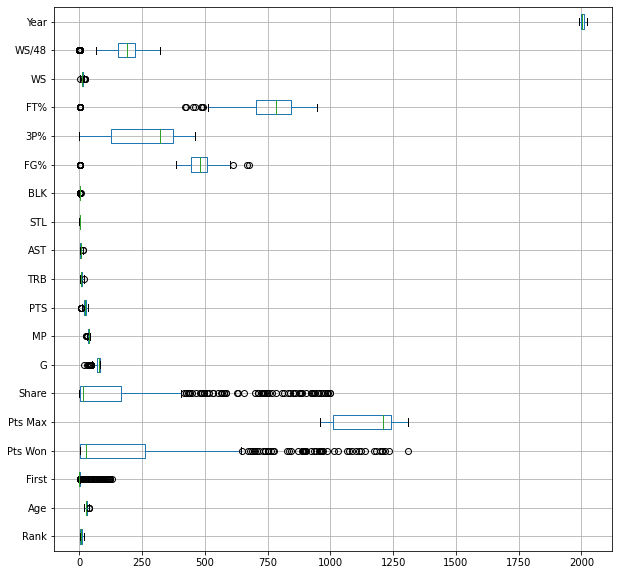

In [ ]:
mvps_numeric.boxplot(vert=False,figsize=(10,10))

In [ ]:
nicknames_numeric = nicknames_df.select_dtypes(include=np.number)
Q1 = nicknames_numeric.quantile(0.25)
Q2 = nicknames_numeric.quantile(0.5)
Q3 = nicknames_numeric.quantile(0.75)
IQR = Q3 - Q1
print("Jumlah outlier pada dataset nicknames di masing-masing fitur adalah")
outliers_df = ((nicknames_numeric < Q1 - 1.5*IQR) | (nicknames_numeric > Q3 + 1.5*IQR))
outliers_df.sum()

Jumlah outlier pada dataset nicknames di masing-masing fitur adalah


Series([], dtype: float64)

In [ ]:
player_mvp_stats_numeric = player_mvp_stats_df.select_dtypes(include=np.number)
Q1 = player_mvp_stats_numeric.quantile(0.25)
Q2 = player_mvp_stats_numeric.quantile(0.5)
Q3 = player_mvp_stats_numeric.quantile(0.75)
IQR = Q3 - Q1
print("Jumlah outlier pada dataset player_mvp_stats di masing-masing fitur adalah")
outliers_df = ((player_mvp_stats_numeric < Q1 - 1.5*IQR) | (player_mvp_stats_numeric > Q3 + 1.5*IQR))
outliers_df.sum()

Jumlah outlier pada dataset player_mvp_stats di masing-masing fitur adalah


Age          11
G             0
GS            0
MP            0
FG          220
FGA         160
FG%        2184
3P          359
3PA         244
3P%           0
2P          340
2PA         310
2P%        2249
eFG%       2105
FT          836
FTA         648
FT%        2713
ORB         611
DRB         590
TRB         590
AST         847
STL         276
BLK        1078
TOV         363
PF            9
PTS         267
Year          0
Pts Won     474
Pts Max     474
Share       474
W             0
L             0
W/L%          0
GB            0
PS/G        108
PA/G         35
SRS          33
dtype: int64

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


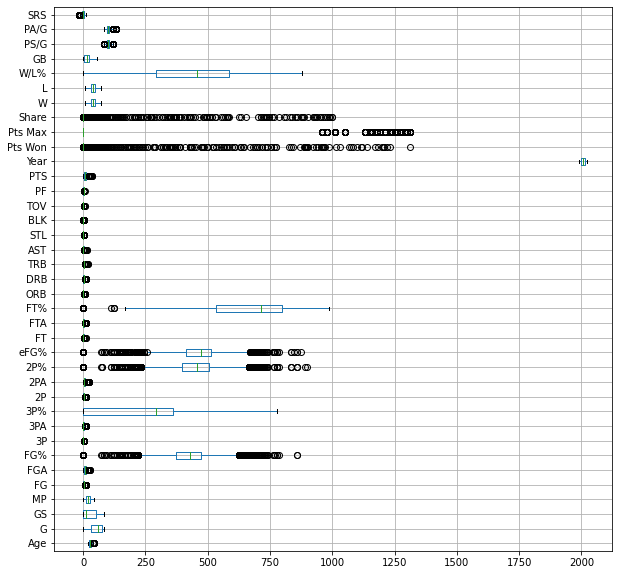

In [ ]:
player_mvp_stats_numeric.boxplot(vert=False,figsize=(10,10))

In [ ]:
players_numeric = players_df.select_dtypes(include=np.number)
Q1 = players_numeric.quantile(0.25)
Q2 = players_numeric.quantile(0.5)
Q3 = players_numeric.quantile(0.75)
IQR = Q3 - Q1
print("Jumlah outlier pada dataset players di masing-masing fitur adalah")
outliers_df = ((players_numeric < Q1 - 1.5*IQR) | (players_numeric > Q3 + 1.5*IQR))
outliers_df.sum()

Jumlah outlier pada dataset players di masing-masing fitur adalah


Rk         0
Age       30
G          0
GS         0
MP         0
FG       314
FGA      267
FG%     2918
3P       416
3PA      340
3P%        0
2P       458
2PA      453
2P%     2979
eFG%    2844
FT       857
FTA      896
FT%        0
ORB      689
DRB      674
TRB      696
AST     1015
STL      313
BLK     1211
TOV      413
PF        24
PTS      352
Year       0
dtype: int64

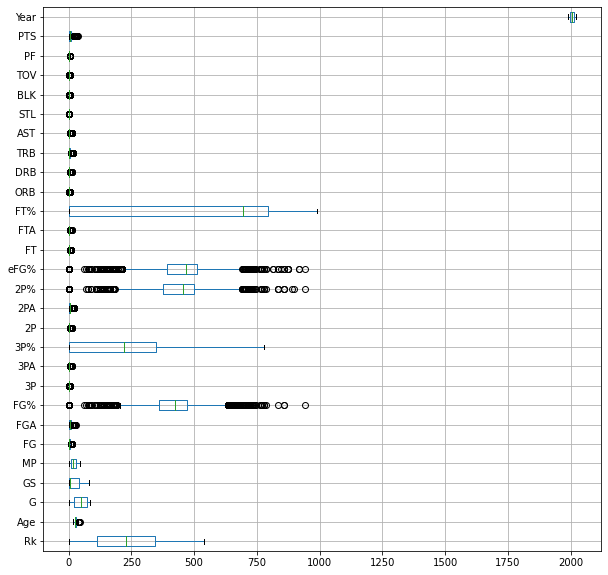

In [ ]:
players_numeric.boxplot(vert=False,figsize=(10,10))

In [ ]:
salaries_numeric = salaries_df.select_dtypes(include=np.number)
Q1 = salaries_numeric.quantile(0.25)
Q2 = salaries_numeric.quantile(0.5)
Q3 = salaries_numeric.quantile(0.75)
IQR = Q3 - Q1
print("Jumlah outlier pada dataset salaries di masing-masing fitur adalah")
outliers_df = ((salaries_numeric < Q1 - 1.5*IQR) | (salaries_numeric > Q3 + 1.5*IQR))
outliers_df.sum()

Jumlah outlier pada dataset salaries di masing-masing fitur adalah


Year          0
Salaries    705
Rank          0
dtype: int64

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


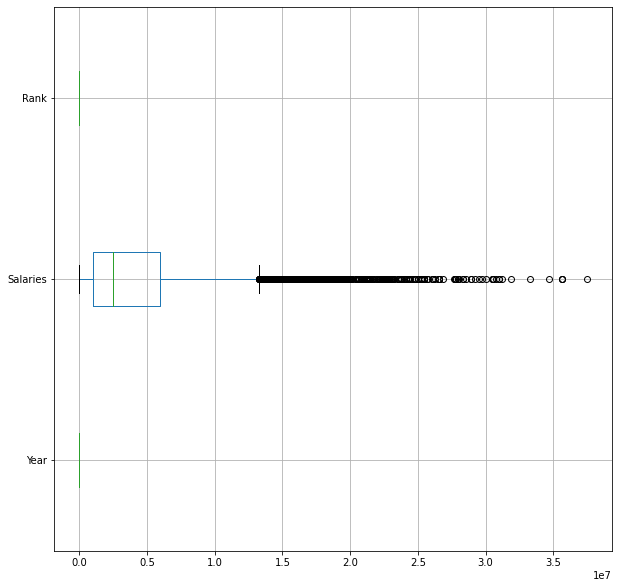

In [ ]:
salaries_numeric.boxplot(vert=False,figsize=(10,10))

In [ ]:
teams_numeric = teams_df.select_dtypes(include=np.number)
Q1 = teams_numeric.quantile(0.25)
Q2 = teams_numeric.quantile(0.5)
Q3 = teams_numeric.quantile(0.75)
IQR = Q3 - Q1
print("Jumlah outlier pada dataset teams di masing-masing fitur adalah")
outliers_df = ((teams_numeric < Q1 - 1.5*IQR) | (teams_numeric > Q3 + 1.5*IQR))
outliers_df.sum()

Jumlah outlier pada dataset teams di masing-masing fitur adalah


W       0
L       0
W/L%    0
GB      1
PS/G    9
PA/G    4
SRS     2
Year    0
dtype: int64

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


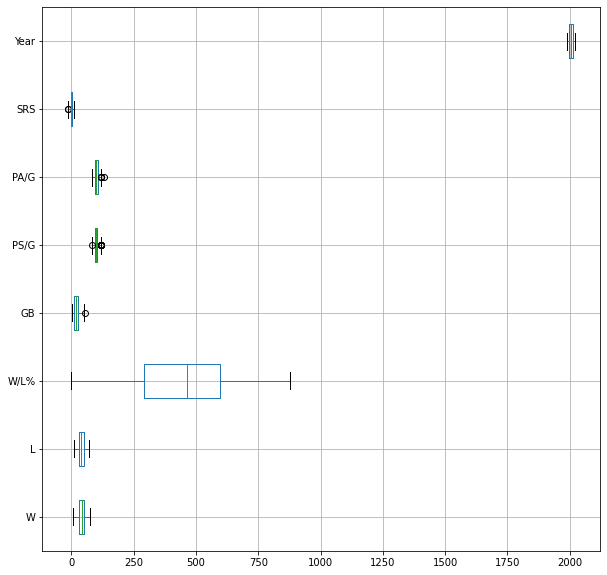

In [ ]:
teams_numeric.boxplot(vert=False,figsize=(10,10))

## 3. Penanganan missing values, duplicate values, dan outliers

### Penanganan missing values

In [ ]:
player_mvp_stats_df.dropna(inplace = True)
player_mvp_stats_df.reset_index(drop=True, inplace=True)
null_check(player_mvp_stats_df)

Tidak ditemukan missing value pada dataset


In [ ]:
salaries_df.dropna(inplace = True)
salaries_df.reset_index(drop=True, inplace=True)
null_check(salaries_df)

Tidak ditemukan missing value pada dataset


In [ ]:
teams_df['GB'] = teams_df['GB'].fillna(0)
teams_df.reset_index(drop=True, inplace=True)
null_check(teams_df)

Tidak ditemukan missing value pada dataset


### Penanganan duplicate values

Karena tidak ada duplicate values maka tidak perlu ditangani.

### Penanganan outliers

In [ ]:
def remove_outliers_in_col(col, df):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  outliers = df[ (df[col] < lower_limit) | (df[col] > upper_limit) ].index
  df.drop(outliers, inplace=True)

In [ ]:
print("mvps_df shape before and after drop outlier")
mvps_df_cleaned = mvps_df.copy()
print(mvps_df_cleaned.shape)
remove_outliers_in_col('Share', mvps_df_cleaned)
remove_outliers_in_col('Pts Won', mvps_df_cleaned)
remove_outliers_in_col('First', mvps_df_cleaned)
mvps_df_cleaned.reset_index(drop=True, inplace=True)
print(mvps_df_cleaned.shape)

mvps_df shape before and after drop outlier
(474, 21)
(322, 21)


In [ ]:
print("player_mvp_stats_df shape before and after drop outlier")
player_mvp_stats_df_cleaned = player_mvp_stats_df.copy()
print(player_mvp_stats_df_cleaned.shape)
remove_outliers_in_col('Share', player_mvp_stats_df_cleaned)
remove_outliers_in_col('Pts Won', player_mvp_stats_df_cleaned)
remove_outliers_in_col('eFG%', player_mvp_stats_df_cleaned)
remove_outliers_in_col('2P%', player_mvp_stats_df_cleaned)
remove_outliers_in_col('FG%', player_mvp_stats_df_cleaned)
player_mvp_stats_df_cleaned.reset_index(drop=True, inplace=True)
print(player_mvp_stats_df_cleaned.shape)

player_mvp_stats_df shape before and after drop outlier
(11817, 41)
(7790, 41)


In [ ]:
print("players_df shape before and after drop outlier")
players_df_cleaned = players_df.copy()
print(players_df_cleaned.shape)
remove_outliers_in_col('eFG%', players_df_cleaned)
remove_outliers_in_col('2P%', players_df_cleaned)
remove_outliers_in_col('FG%', players_df_cleaned)
players_df_cleaned.reset_index(drop=True, inplace=True)
print(players_df_cleaned.shape)

players_df shape before and after drop outlier
(17386, 31)
(11607, 31)


In [ ]:
print("salaries_df shape before and after drop outlier")
salaries_df_cleaned = salaries_df.copy()
print(salaries_df_cleaned.shape)
remove_outliers_in_col('Salaries', salaries_df_cleaned)
salaries_df_cleaned.reset_index(drop=True, inplace=True)
print(salaries_df_cleaned.shape)

salaries_df shape before and after drop outlier
(9346, 4)
(8641, 4)


## 4. Hasil Preprocessing

### a) mvps.csv

In [ ]:
mvps_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     322 non-null    int64  
 1   Player   322 non-null    object 
 2   Age      322 non-null    int64  
 3   Tm       322 non-null    object 
 4   First    322 non-null    int64  
 5   Pts Won  322 non-null    int64  
 6   Pts Max  322 non-null    int64  
 7   Share    322 non-null    float64
 8   G        322 non-null    int64  
 9   MP       322 non-null    float64
 10  PTS      322 non-null    float64
 11  TRB      322 non-null    float64
 12  AST      322 non-null    float64
 13  STL      322 non-null    float64
 14  BLK      322 non-null    float64
 15  FG%      322 non-null    float64
 16  3P%      322 non-null    float64
 17  FT%      322 non-null    float64
 18  WS       322 non-null    float64
 19  WS/48    322 non-null    float64
 20  Year     322 non-null    int64  
dtypes: float64(12), 

In [ ]:
mvps_df_cleaned

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,5,Karl Malone,27,UTA,0,142,960,148.00,82,40.3,...,11.8,3.3,1.1,1.0,527.00,286.0,0.77,15.5,225.00,1991
1,7,Kevin Johnson,24,PHO,0,32,960,33.00,77,36.0,...,3.5,10.1,2.1,0.1,516.00,205.0,843.00,12.7,0.22,1991
2,8,Dominique Wilkins,31,ATL,0,29,960,0.03,81,38.0,...,9.0,3.3,1.5,0.8,0.47,341.0,829.00,11.4,177.00,1991
3,9,Larry Bird,34,BOS,0,25,960,26.00,60,38.0,...,8.5,7.2,1.8,1.0,454.00,389.0,891.00,6.6,0.14,1991
4,9,Terry Porter,27,POR,0,25,960,26.00,81,32.9,...,3.5,8.0,2.0,0.1,515.00,415.0,823.00,13.0,235.00,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,11,Russell Westbrook,32,WAS,0,5,1010,5.00,65,36.4,...,11.5,11.7,1.4,0.4,439.00,315.0,656.00,3.7,75.00,2021
318,12,Ben Simmons,24,PHI,0,3,1010,3.00,58,32.4,...,7.2,6.9,1.6,0.6,557.00,0.3,613.00,6.0,153.00,2021
319,13,James Harden,31,TOT,0,1,1010,1.00,44,36.6,...,7.9,10.8,1.2,0.8,466.00,362.0,861.00,7.0,208.00,2021
320,13,LeBron James,36,LAL,0,1,1010,1.00,45,33.4,...,7.7,7.8,1.1,0.6,513.00,365.0,698.00,5.6,179.00,2021


### b) nicknames.csv

In [ ]:
nicknames_df_cleaned = nicknames_df
nicknames_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Abbreviation  40 non-null     object
 1   Name          40 non-null     object
dtypes: object(2)
memory usage: 768.0+ bytes


In [ ]:
nicknames_df_cleaned

,Abbreviation,Name
0,ATL,Atlanta Hawks
1,BRK,Brooklyn Nets
2,BKN,Brooklyn Nets
3,BOS,Boston Celtics
4,CHA,Charlotte Bobcats
5,CHH,Charlotte Hornets
6,CHO,Charlotte Hornets
7,CHI,Chicago Bulls
8,CLE,Cleveland Cavaliers
9,DAL,Dallas Mavericks


### c) player_mvp_stats.csv

In [ ]:
player_mvp_stats_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7790 entries, 0 to 7789
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   7790 non-null   object 
 1   Pos      7790 non-null   object 
 2   Age      7790 non-null   int64  
 3   Tm       7790 non-null   object 
 4   G        7790 non-null   int64  
 5   GS       7790 non-null   int64  
 6   MP       7790 non-null   float64
 7   FG       7790 non-null   float64
 8   FGA      7790 non-null   float64
 9   FG%      7790 non-null   float64
 10  3P       7790 non-null   float64
 11  3PA      7790 non-null   float64
 12  3P%      7790 non-null   float64
 13  2P       7790 non-null   float64
 14  2PA      7790 non-null   float64
 15  2P%      7790 non-null   float64
 16  eFG%     7790 non-null   float64
 17  FT       7790 non-null   float64
 18  FTA      7790 non-null   float64
 19  FT%      7790 non-null   float64
 20  ORB      7790 non-null   float64
 21  DRB      7790 

In [ ]:
player_mvp_stats_df_cleaned

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,476.0,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
1,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,492.0,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
2,Larry Drew,PG,32,LAL,48,2,10.3,1.1,2.6,432.0,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
3,Sam Perkins,PF,29,LAL,73,66,34.3,5.0,10.2,495.0,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
4,Terry Teagle,SG,30,LAL,82,0,18.3,4.1,9.2,443.0,...,0,0.0,Los Angeles Lakers,58,24,707.0,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7785,Michael Beasley,PF,28,MIL,56,6,16.7,3.9,7.3,532.0,...,0,0.0,Milwaukee Bucks,42,40,512.0,9.0,103.6,103.8,-0.45
7786,Rashad Vaughn,SG,20,MIL,41,2,11.2,1.4,3.8,365.0,...,0,0.0,Milwaukee Bucks,42,40,512.0,9.0,103.6,103.8,-0.45
7787,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,484.0,...,0,0.0,Milwaukee Bucks,42,40,512.0,9.0,103.6,103.8,-0.45
7788,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,459.0,...,0,0.0,Milwaukee Bucks,42,40,512.0,9.0,103.6,103.8,-0.45


### d) players.csv

In [ ]:
players_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11607 entries, 0 to 11606
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      11607 non-null  int64  
 1   Player  11607 non-null  object 
 2   Pos     11607 non-null  object 
 3   Age     11607 non-null  int64  
 4   Tm      11607 non-null  object 
 5   G       11607 non-null  int64  
 6   GS      11607 non-null  int64  
 7   MP      11607 non-null  float64
 8   FG      11607 non-null  float64
 9   FGA     11607 non-null  float64
 10  FG%     11607 non-null  float64
 11  3P      11607 non-null  float64
 12  3PA     11607 non-null  float64
 13  3P%     11607 non-null  float64
 14  2P      11607 non-null  float64
 15  2PA     11607 non-null  float64
 16  2P%     11607 non-null  float64
 17  eFG%    11607 non-null  float64
 18  FT      11607 non-null  float64
 19  FTA     11607 non-null  float64
 20  FT%     11607 non-null  float64
 21  ORB     11607 non-null  float64
 22

In [ ]:
players_df_cleaned

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11602,534,Christian Wood,C,25,HOU,41,41,32.3,8.0,15.6,...,1.9,7.8,9.6,1.7,0.8,1.2,2.0,2.1,21.0,2021
11603,536,Delon Wright,SG-PG,28,TOT,63,39,27.7,3.8,8.2,...,1.0,3.2,4.3,4.4,1.6,0.5,1.3,1.2,10.2,2021
11604,536,Delon Wright,SG,28,DET,36,31,29.2,3.8,8.1,...,1.0,3.5,4.6,5.0,1.6,0.5,1.3,1.3,10.4,2021
11605,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021


### e) salaries.csv

In [ ]:
salaries_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8641 entries, 0 to 8640
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      8641 non-null   object 
 1   Year      8641 non-null   int64  
 2   Salaries  8641 non-null   float64
 3   Rank      8641 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 270.2+ KB


In [ ]:
salaries_df_cleaned

,Name,Year,Salaries,Rank
0,Larry Johnson,2000,11910000.0,7
1,Gary Payton,2000,11020000.0,8
2,Rasheed Wallace,2000,10800000.0,9
3,Shawn Kemp,2000,10780000.0,10
4,Damon Stoudamire,2000,10125000.0,11
...,...,...,...,...
8636,George King,2019,77250.0,487
8637,Drew Eubanks,2019,77250.0,487
8638,Jordan Loyd,2019,77250.0,487
8639,Wenyen Gabriel,2019,75000.0,512


### f) teams.csv

In [ ]:
teams_df_cleaned = teams_df
teams_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       906 non-null    int64  
 1   L       906 non-null    int64  
 2   W/L%    906 non-null    float64
 3   GB      906 non-null    float64
 4   PS/G    906 non-null    float64
 5   PA/G    906 non-null    float64
 6   SRS     906 non-null    float64
 7   Year    906 non-null    int64  
 8   Team    906 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 63.8+ KB


In [ ]:
teams_df_cleaned

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,683.0,0.0,111.5,105.7,5.22,1991,Boston Celtics
1,44,38,537.0,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers
2,39,43,476.0,17.0,103.1,103.3,-0.43,1991,New York Knicks
3,30,52,366.0,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,317.0,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
...,...,...,...,...,...,...,...,...,...
901,42,30,583.0,0.0,112.4,110.2,2.26,2021,Dallas Mavericks
902,38,34,528.0,4.0,113.3,112.3,1.07,2021,Memphis Grizzlies
903,33,39,458.0,9.0,111.1,112.8,-1.58,2021,San Antonio Spurs
904,31,41,431.0,11.0,114.6,114.9,-0.20,2021,New Orleans Pelicans


# Problem Set 1

## a) Apakah yang menjadi faktor utama (secara statistik) seorang pemain menjadi MVP?

In [ ]:
# Menggunakan dataset player_mvp_stats_df yang belum dilakukan prepocessing
df1a = player_mvp_stats_df.drop(['Pts Won','Pts Max','Share','Year'],axis=1) # drop asumsi kolom yang tidak berkorelasi

Text(0.5, 1.0, 'Faktor Pemain Menjadi MVP')

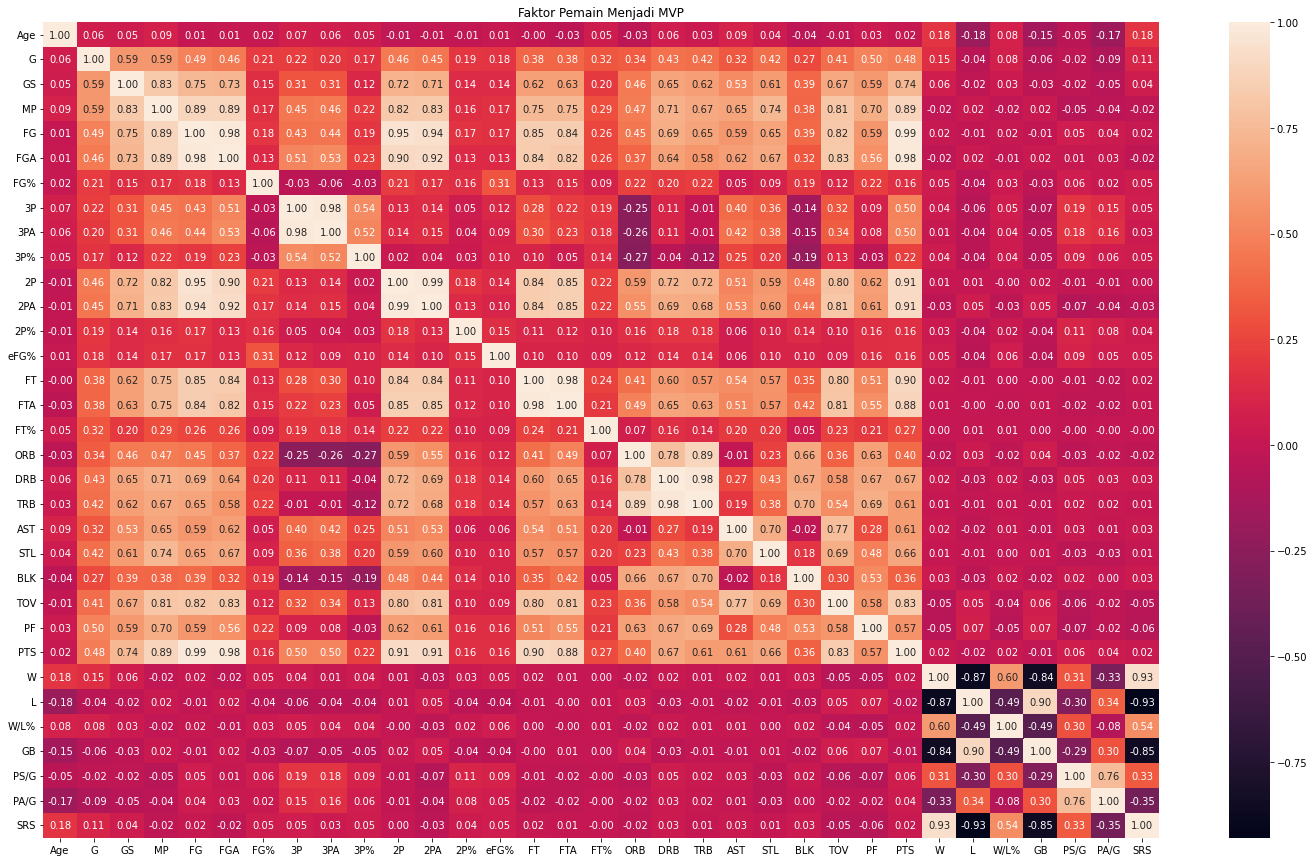

In [ ]:
plt.figure(figsize = (25,15))
sns.heatmap(df1a.corr(method='pearson'), annot=True, fmt="0.2f")
plt.title('Faktor Pemain Menjadi MVP')

3 Kolom yang paling berkolerasi tinggi adalah MP, FG, dan FGA. FG dan FGA (Field Goal dan Field Goal Attempt) sudah pasti berkorelasi tinggi dengan PTS. Maka, yang paling cocok untuk menjadi faktor utama seorang player menjadi MVP berdasarkan korelasi tertinggi dengan kolom PTS adalah Minutes Played.

## b) Apakah terdapat kenaikan rata-rata gaji pemain dari tahun 2000 - 2019?

In [ ]:
# Menggunakan dataset salaries_df yang belum dilakukan prepocessing
avg_salary_by_year_df = salaries_df[['Year', 'Salaries']].copy()

In [ ]:
# Cari rata-rata penghasilan setiap pemain pada tiap tahun
df1b = avg_salary_by_year_df.groupby('Year')['Salaries'].mean().to_frame()

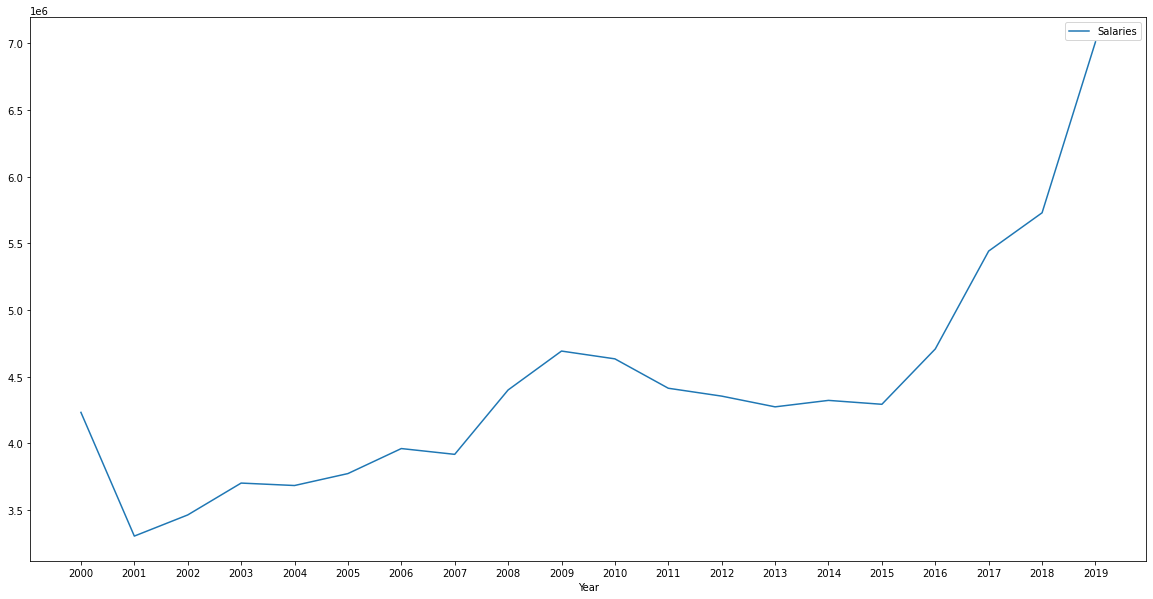

In [ ]:
import matplotlib.ticker as ticker
ax = df1b.plot(figsize=(20, 10))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

Dilihat dari visualisasi linechart diatas, terdapat kenaikan gaji pemain bola basket yang cukup konsisten pada tahun 2000 - 2019. Kenaikan gaji yang signifikan terjadi pada kisaran tahun 2018 - 2019

## c) Apakah kemenangan dari suatu tim dapat dikorelasikan dengan suatu variabel tertentu?

Text(0.5, 1.0, 'Korelasi Kemenangan dari Suatu Tim')

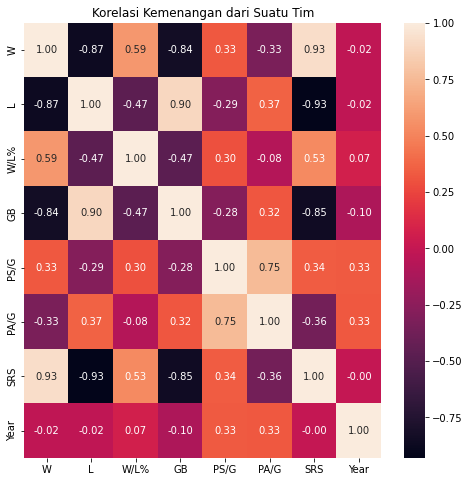

In [ ]:
# Menggunakan dataset teams_df yang belum dilakukan prepocessing
plt.figure(figsize = (8,8))
sns.heatmap(teams_df.corr(method='pearson'), annot=True, fmt="0.2f")
plt.title('Korelasi Kemenangan dari Suatu Tim')

Berdasarkan visualisasi heatmap diatas, terdapat korelasi yang cukup kuat antara kolom 'W' (jumlah kemenangan) dengan kolom 'SRS' atau Simple Rating System dengan nilai korelasi sebesar 0.93

## d) Tahun berapakah yang merupakan tahun yang paling kompetitif untuk liga NBA?

In [ ]:
# Menggunakan dataset players_df yang belum dilakukan prepocessing
pts_per_year_df = players_df[['PTS', 'Year']].copy()

In [ ]:
# Cari min dan max poin setiap tahun dan hitung selisihnya
df1d = pts_per_year_df.groupby('Year', as_index=False).agg({'PTS': ['min', 'max']})
df1d["diff"] = df1d[('PTS', 'max')] - df1d[('PTS', 'min')]

[Text(0.5, 1.0, 'Selisih pemain yang mencetak point terbanyak dan terdikit setiap tahunnya')]

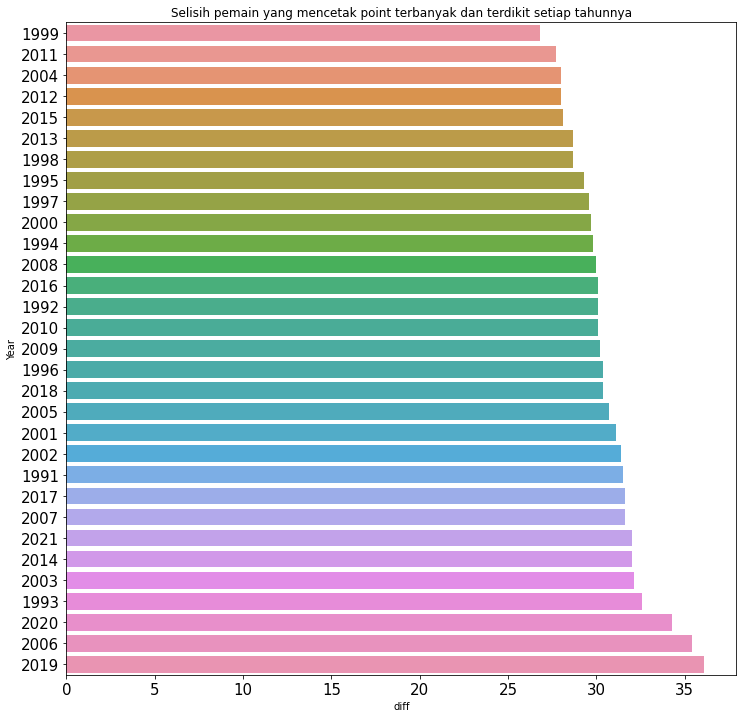

In [ ]:
plt.figure(figsize=(12,12))
plt.xticks(size=15)
plt.yticks(size=15)
sns.barplot(data=df1d, x="diff", y='Year', order=df1d.sort_values("diff").Year, orient = 'h').set(title='Selisih pemain yang mencetak point terbanyak dan terdikit setiap tahunnya')

Dari hasil visualisasi di atas, didapatkan tahun yang paling kompetitif berdasarkan selisih terkecil antara pemain yang mencetak poin tertinggi dan terendah setiap tahunnya adalah tahun 1999. Ini berarti pada tahun 1999, range perolehan poin adalah yang paling kecil dibanding tahun lainnya sehingga tingkat kompetitif pemain paling tinggi pada tahun tersebut.

## e) Pada kisaran umur berapa pemain paling banyak memberikan poin?

In [ ]:
# Menggunakan dataset players_df yang belum dilakukan prepocessing
umur_point = players_df[['PTS','Age']].copy()

In [ ]:
# Cari rata-rata perolehan poin setiap pemain pada tiap umur
df1e = umur_point.groupby(['Age'], as_index=False).mean()

[Text(0.5, 1.0, 'Rata-rata perolehan poin pemain di setiap umur')]

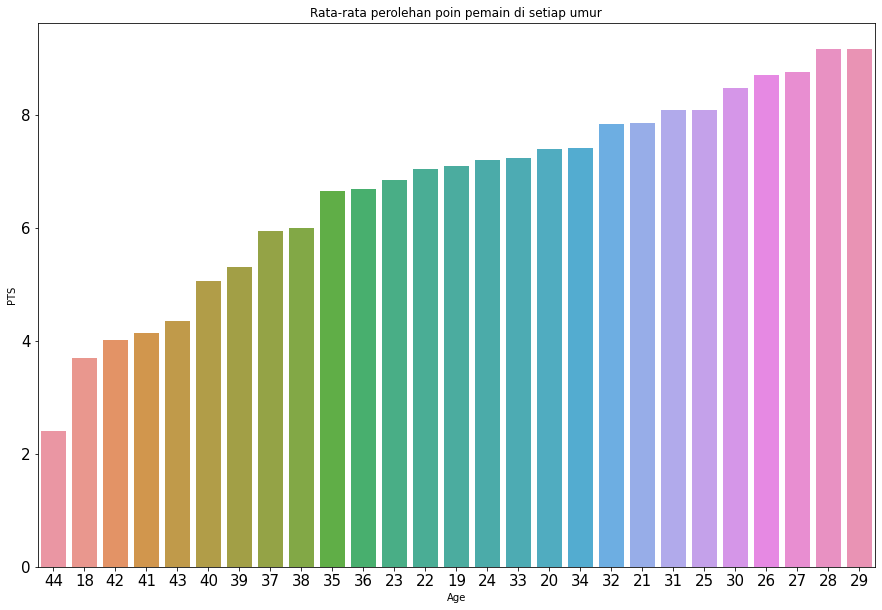

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(size=15)
plt.yticks(size=15)
sns.barplot(data=df1e, x="Age", y='PTS', order=df1e.sort_values('PTS').Age).set(title='Rata-rata perolehan poin pemain di setiap umur')

Berdasarkan visualisasi di atas, umur 28 dan 29 merupakan umur pemain paling banyak memberikan poin.

## f) Tim manakah yang merupakan tim ‘terbaik’ berdasarkan rata-rata kemenangan per tim setiap tahunnya?

In [ ]:
# Menggunakan dataset teams_df yang belum dilakukan prepocessing
avg_win_by_year_df = teams_df[['W', 'Team']].copy()

In [ ]:
# Cari rata-rata jumlah kemenangan pertim setiap tahun
df1f = avg_win_by_year_df.groupby('Team', as_index=False).mean()

[Text(0.5, 1.0, 'Rata-rata kemenangan per tim setiap tahun')]

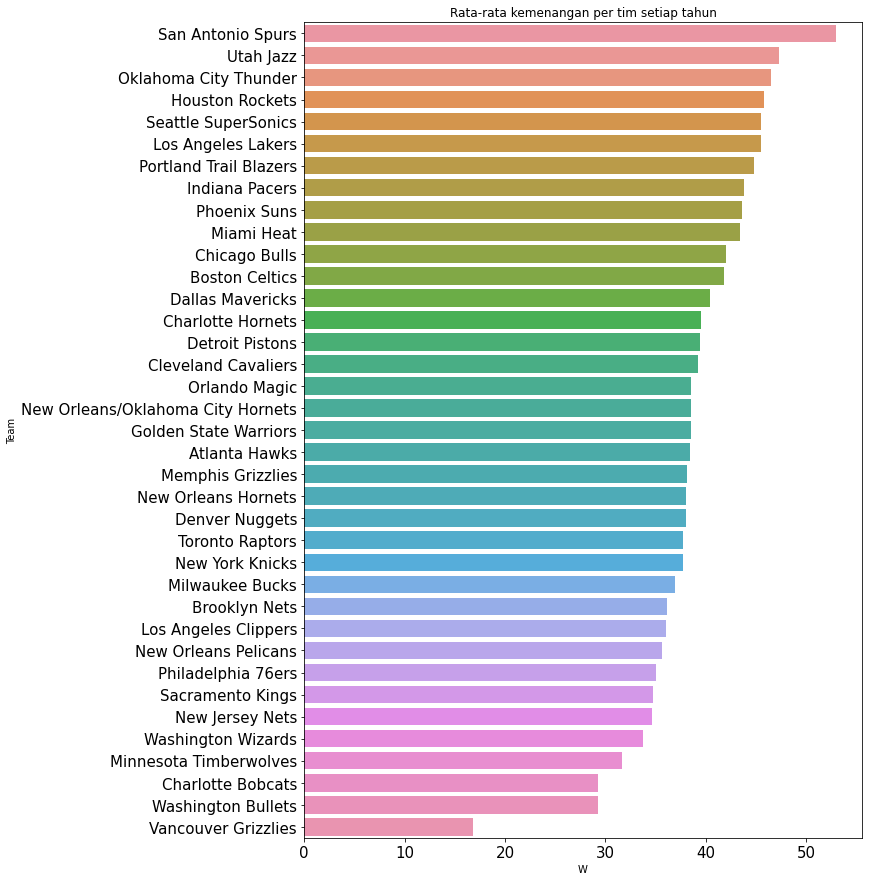

In [ ]:
plt.figure(figsize=(10,15))
plt.xticks(size=15)
plt.yticks(size=15)
sns.barplot(data=df1f, x="W", y='Team', order=df1f.sort_values("W", ascending=False).Team).set(title='Rata-rata kemenangan per tim setiap tahun')

Berdasarkan visualisasi diatas, tim San Antonio Spurs adalah tim yang 'terbaik' dengan rata-rata kemenangan lebih dari 50 setiap tahunnya.

#Problem Set 2

##A. Buatlah model untuk memprediksi posisi dari seorang pemain (C, PF, SF, SG, PG)!

###Preparation

In [ ]:
#Storing imports and functions

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, precision_score, recall_score, classification_report, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)

def f1score(model, X, y, _cv):
  score = cross_val_score(model, X, y, cv=_cv, scoring='f1_micro')
  for i in range(len(score)):
    print("Fold #%d Micro F1-Score: %f" % (i+1, score[i]))
  print("Average Micro F1-Score: %f" % (score.mean()))

Karena yang diminta hanya lima posisi, maka baris yang mengandung posisi selain kelimanya akan di-remove.

In [ ]:
players_2a = players_df_cleaned.copy()
players_2a = players_2a[players_2a['Pos'].isin(['PF', 'C', 'PG', 'SG', 'SF'])]
players_2a.Pos.value_counts()

PF    2486
C     2373
PG    2267
SG    2266
SF    2058
Name: Pos, dtype: int64

Dapat dilihat bahwa kasus klasifikasi yang akan dilakukan memiliki data yang balanced

Selanjutnya, kolom-kolom yang sekiranya redundan dan tidak relevan terhadap penentuan posisi pemain akan di-remove juga.

In [ ]:
players_2a = players_2a.drop(['Player', 'Tm', 'Rk', 'Year', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'PF'],axis=1)

Dari fitur-fitur yang tersisa, akan diseleksi subset dari fitur-fitur tersebut menggunakan feature selection yang sekiranya dapat memberikan akurasi terbaik

In [ ]:
X_raw = players_2a.drop(['Pos'],axis=1)
y = players_2a['Pos']
selector = SelectKBest(f_classif, k=11)
X = selector.fit_transform(X_raw, y)
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

array(['FG%', '3P%', '2P%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PTS'], dtype=object)

Split data menjadi training dan testing dengan rasio 4:1 dan stratify pada y agar mengeliminasi bias pada test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 100)

Penentuan best model nantinya akan didasari oleh hasil CV tiap model pada data training. CV tersebut akan dilakukan dengan 5x fold

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state = 100)

count = 1
for train_index, test_index in kf.split(X_train, y_train):
    print(f'Fold:{count}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    count += 1

Fold:1, Train set: 7328, Test set:1832
Fold:2, Train set: 7328, Test set:1832
Fold:3, Train set: 7328, Test set:1832
Fold:4, Train set: 7328, Test set:1832
Fold:5, Train set: 7328, Test set:1832


###Modeling

####Penentuan Best Model Menggunakan CV

#####1. Softmax Regression

Karena softmax regression merupakan salah satu algoritma berbasis gradient descent, maka harus dilakukan scaling terlebih dahulu

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
softmax = LogisticRegression(multi_class='multinomial', solver='newton-cg', penalty='l2', max_iter=400)
print("---Softmax Regression Scoring---")
f1score(softmax, X_train_scaled, y_train, kf)

---Softmax Regression Scoring---
Fold #1 Micro F1-Score: 0.619541
Fold #2 Micro F1-Score: 0.647926
Fold #3 Micro F1-Score: 0.621725
Fold #4 Micro F1-Score: 0.632642
Fold #5 Micro F1-Score: 0.615721
Average Micro F1-Score: 0.627511


#####2. Decision Tree

Penentuan parameter akan dilakukan dengan hyperparameter tuning

In [ ]:
param_grid = {'min_samples_leaf': [3, 5, 7, 10, 12, 15],
              'min_samples_split': [3, 5, 7, 10, 12, 15],
              'max_depth' : [5, 10, 12, 15, None]}

dt = DecisionTreeClassifier()

clf = GridSearchCV(estimator=dt,
                   param_grid=param_grid,
                   cv=kf)

clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 12, 15, None],
                         'min_samples_leaf': [3, 5, 7, 10, 12, 15],
                         'min_samples_split': [3, 5, 7, 10, 12, 15]})

In [ ]:
clf.best_params_

{'max_depth': 10, 'min_samples_leaf': 12, 'min_samples_split': 7}

In [ ]:
dt = DecisionTreeClassifier(**clf.best_params_)
print("---Decision Tree Scoring---")
f1score(dt, X_train, y_train, kf)

---Decision Tree Scoring---
Fold #1 Micro F1-Score: 0.568231
Fold #2 Micro F1-Score: 0.599891
Fold #3 Micro F1-Score: 0.558952
Fold #4 Micro F1-Score: 0.593886
Fold #5 Micro F1-Score: 0.585153
Average Micro F1-Score: 0.581223


#####3. Random Forest

Penentuan parameter akan dilakukan dengan hyperparameter tuning

In [ ]:
param_grid = {'min_samples_leaf': [3, 5, 7, 10, 12, 15],
              'min_samples_split': [3, 5, 7, 10, 12, 15],
              'max_depth' : [5, 10, 12, 15, None]}

rf = RandomForestClassifier()

clf = GridSearchCV(estimator=rf,
                   param_grid=param_grid,
                   cv=kf)

clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 12, 15, None],
                         'min_samples_leaf': [3, 5, 7, 10, 12, 15],
                         'min_samples_split': [3, 5, 7, 10, 12, 15]})

In [ ]:
clf.best_params_

{'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 10}

In [ ]:
rf = RandomForestClassifier(**clf.best_params_)
print("---Random Forest Scoring---")
f1score(rf, X_train, y_train, kf)

---Random Forest Scoring---
Fold #1 Micro F1-Score: 0.639738
Fold #2 Micro F1-Score: 0.657751
Fold #3 Micro F1-Score: 0.617358
Fold #4 Micro F1-Score: 0.645742
Fold #5 Micro F1-Score: 0.621179
Average Micro F1-Score: 0.636354


#####4. K-nearest Neighbors

Karena KNN merupakan salah satu algoritma berbasis jarak, maka harus dilakukan scaling terlebih dahulu

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Akan dilakukan juga hyperparameter tuning untuk mendapatkan jumlah neighbors yang paling optimal

In [ ]:
knn = KNeighborsClassifier()

tunned_params = [
  {
    'n_neighbors': [20, 23, 25, 27, 30, 33]
  }
]

print("##### Tuning hyper-parameters model KNN #####")
print()

clf = GridSearchCV(knn, tunned_params, scoring="accuracy", cv=kf, verbose = 2)

clf.fit(X_train_scaled, y_train)

##### Tuning hyper-parameters model KNN #####

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .....................................n_neighbors=20; total time=   0.3s
[CV] END .....................................n_neighbors=20; total time=   0.2s
[CV] END .....................................n_neighbors=20; total time=   0.4s
[CV] END .....................................n_neighbors=20; total time=   0.3s
[CV] END .....................................n_neighbors=20; total time=   0.3s
[CV] END .....................................n_neighbors=23; total time=   0.2s
[CV] END .....................................n_neighbors=23; total time=   0.1s
[CV] END .....................................n_neighbors=23; total time=   0.1s
[CV] END .....................................n_neighbors=23; total time=   0.1s
[CV] END .....................................n_neighbors=23; total time=   0.2s
[CV] END .....................................n_neighbors=25; total time=   0.1s
[C

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [20, 23, 25, 27, 30, 33]}],
             scoring='accuracy', verbose=2)

In [ ]:
clf.best_params_

{'n_neighbors': 30}

In [ ]:
knn = KNeighborsClassifier(**clf.best_params_)
print("---K-nearest Neighbors Scoring---")
f1score(knn, X_train_scaled, y_train, kf)

---K-nearest Neighbors Scoring---
Fold #1 Micro F1-Score: 0.603712
Fold #2 Micro F1-Score: 0.610808
Fold #3 Micro F1-Score: 0.603166
Fold #4 Micro F1-Score: 0.600983
Fold #5 Micro F1-Score: 0.588428
Average Micro F1-Score: 0.601419


####Penerapan Best Model pada Testing Data

Dari hasil CV pada setiap model yang telah dilakukan sebelumnya, didapatkan kesimpulan bahwa model Random Forest yang sudah tuned memiliki rerata skor F1 micro tertinggi dibanding ketiga model lainnya. Oleh karena itu, model tersebut akan diterapkan pada data test yang telah di-split di awal

In [ ]:
rf.fit(X_train, y_train)
y_prediction = rf.predict(X_test)
evaluate_classifier_performance(y_prediction, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           C       0.68      0.73      0.70       475
          PF       0.55      0.48      0.51       497
          PG       0.82      0.82      0.82       453
          SF       0.55      0.55      0.55       412
          SG       0.60      0.64      0.62       453

    accuracy                           0.64      2290
   macro avg       0.64      0.64      0.64      2290
weighted avg       0.64      0.64      0.64      2290


F1 Macro Average: 0.6412721233010193
F1 Micro Average: 0.643231441048035
Precision Macro Average: 0.6401855072080649
Precision Micro Average: 0.643231441048035
Recall Macro Average: 0.643921914682628
Recall Micro Average: 0.643231441048035

Confusion Matrix



prediction,C,PF,PG,SF,SG
actual,,,,,
C,346,118,1,10,0
PF,144,237,3,91,22
PG,0,3,373,4,73
SF,16,65,9,226,96
SG,2,9,68,83,291


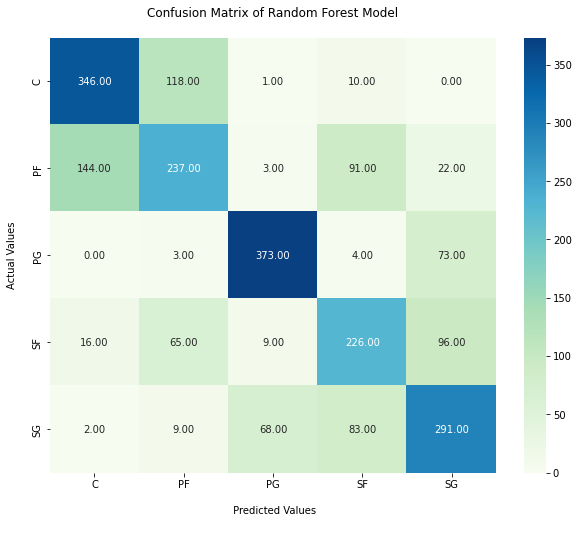

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix of Random Forest Model\n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['C', 'PF', 'PG', 'SF', 'SG'])
fx.yaxis.set_ticklabels(['C', 'PF', 'PG', 'SF', 'SG'])
plt.show()

###Conclusion

Dari modeling yang telah dilakukan pada keempat model, tingkat rerata akurasi yang didapatkan berkisar antara 58% s.d. 65% dengan tingkat akurasi tertinggi sebesar 65% dihasilkan oleh model Random Forest. Hal tersebut berarti model Random Forest memiliki probabilitas sebesar 65% dalam memprediksi posisi pemain NBA dengan tepat berdasarkan data yang tersedia. Angka tersebut memang masih belum terlalu memuaskan. Hal itu bisa saja disebabkan oleh data yang memang kurang baik maupun konfigurasi model yang masih kurang optimal.

##B. Buatlah model untuk memprediksi gaji dari seorang pemain!

###Pre-processing

In [ ]:
players_df_cleaned = players_df_cleaned.rename(columns={'Player': 'Name'})
players_df_cleaned

,Rk,Name,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11602,534,Christian Wood,C,25,HOU,41,41,32.3,8.0,15.6,...,1.9,7.8,9.6,1.7,0.8,1.2,2.0,2.1,21.0,2021
11603,536,Delon Wright,SG-PG,28,TOT,63,39,27.7,3.8,8.2,...,1.0,3.2,4.3,4.4,1.6,0.5,1.3,1.2,10.2,2021
11604,536,Delon Wright,SG,28,DET,36,31,29.2,3.8,8.1,...,1.0,3.5,4.6,5.0,1.6,0.5,1.3,1.3,10.4,2021
11605,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021


In [ ]:
players_salaries = pd.merge(players_df_cleaned, salaries_df_cleaned, on=['Name', 'Year'])
players_salaries

,Rk,Name,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Salaries,Rank
0,14,Darrell Armstrong,PG,31,ORL,82,82,31.6,5.9,13.6,...,3.3,6.1,2.1,0.1,3.0,1.7,16.2,2000,4125000.0,56
1,24,Brent Barry,SG,28,SEA,80,74,34.1,4.1,8.8,...,4.7,3.6,1.3,0.4,1.8,2.9,11.8,2000,3960000.0,58
2,28,Jonathan Bender,SF,19,IND,24,1,5.4,1.0,2.9,...,0.9,0.1,0.0,0.2,0.3,0.8,2.7,2000,2214000.0,95
3,32,Travis Best,PG,27,IND,82,0,20.6,3.3,6.8,...,1.7,3.3,0.9,0.1,1.3,2.5,8.9,2000,3250000.0,68
4,33,Mike Bibby,PG,21,VAN,82,82,38.5,5.6,12.6,...,3.7,8.1,1.6,0.2,3.0,2.1,14.5,2000,3092000.0,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5954,523,Guerschon Yabusele,PF,23,BOS,41,1,6.1,0.9,1.9,...,1.3,0.4,0.2,0.2,0.4,0.8,2.3,2019,2667600.0,280
5955,528,Tyler Zeller,C,29,TOT,6,1,15.5,2.7,5.0,...,4.0,0.7,0.2,0.5,0.7,3.3,7.7,2019,1933941.0,339
5956,528,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,...,4.5,0.8,0.3,0.8,1.0,4.0,11.5,2019,1933941.0,339
5957,530,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,...,6.1,1.1,0.2,0.9,1.2,2.3,8.9,2019,1544951.0,389


In [ ]:
players_salaries['Salaries'].describe()

count    5.959000e+03
mean     3.529876e+06
std      3.159293e+06
min      2.431500e+04
25%      1.050000e+06
50%      2.484000e+06
75%      5.018480e+06
max      1.327096e+07
Name: Salaries, dtype: float64

In [ ]:
range = players_salaries['Salaries'].max() - players_salaries['Salaries'].min()
range

13246649.0

In [ ]:
null_check(players_salaries)

Tidak ditemukan missing value pada dataset


In [ ]:
print("Jumlah Nilai Duplikat pada players_salaries:", players_salaries.duplicated().sum())

Jumlah Nilai Duplikat pada players_salaries: 0


In [ ]:
Q1 = players_salaries.quantile(0.25)
Q3 = players_salaries.quantile(0.75)
IQR = Q3 - Q1
outliers = ((players_salaries  < (Q1 - 1.5 * IQR)) | (players_salaries > (Q3 + 1.5 * IQR))).sum()
outliers

<ipython-input-133-d43a31f67f9f>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((players_salaries  < (Q1 - 1.5 * IQR)) | (players_salaries > (Q3 + 1.5 * IQR))).sum()


2P           139
2P%           98
2PA          181
3P            96
3P%            0
3PA           65
AST          374
Age           18
BLK          385
DRB          220
FG            88
FG%           79
FGA           96
FT           309
FT%         1183
FTA          254
G              0
GS             0
MP             0
Name           0
ORB          227
PF             4
PTS          132
Pos            0
Rank           0
Rk             0
STL          212
Salaries     268
TOV          174
TRB          209
Tm             0
Year           0
eFG%         144
dtype: int64

In [ ]:
skew_val = players_salaries.skew(axis = 0, skipna = True)
skew_val

<ipython-input-134-79c073de6bbe>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew_val = players_salaries.skew(axis = 0, skipna = True)


Rk          0.058248
Age         0.541412
G          -0.379630
GS          1.000810
MP          0.233640
FG          0.969537
FGA         0.956224
FG%         0.041539
3P          1.216433
3PA         1.063154
3P%        -0.020573
2P          1.181749
2PA         1.171315
2P%        -0.253402
eFG%       -0.449284
FT          1.898600
FTA         1.735364
FT%        -1.136915
ORB         1.376409
DRB         1.265484
TRB         1.292177
AST         1.899833
STL         1.087160
BLK         2.452603
TOV         1.124279
PF          0.094582
PTS         1.055708
Year        0.012004
Salaries    1.219146
Rank        0.115295
dtype: float64

In [ ]:
players_salaries = players_salaries.drop(columns=['Year', 'Name'])
players_salaries

,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salaries,Rank
0,14,PG,31,ORL,82,82,31.6,5.9,13.6,433.0,...,2.5,3.3,6.1,2.1,0.1,3.0,1.7,16.2,4125000.0,56
1,24,SG,28,SEA,80,74,34.1,4.1,8.8,463.0,...,4.0,4.7,3.6,1.3,0.4,1.8,2.9,11.8,3960000.0,58
2,28,SF,19,IND,24,1,5.4,1.0,2.9,329.0,...,0.7,0.9,0.1,0.0,0.2,0.3,0.8,2.7,2214000.0,95
3,32,PG,27,IND,82,0,20.6,3.3,6.8,483.0,...,1.5,1.7,3.3,0.9,0.1,1.3,2.5,8.9,3250000.0,68
4,33,PG,21,VAN,82,82,38.5,5.6,12.6,445.0,...,2.8,3.7,8.1,1.6,0.2,3.0,2.1,14.5,3092000.0,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5954,523,PF,23,BOS,41,1,6.1,0.9,1.9,455.0,...,0.7,1.3,0.4,0.2,0.2,0.4,0.8,2.3,2667600.0,280
5955,528,C,29,TOT,6,1,15.5,2.7,5.0,533.0,...,2.2,4.0,0.7,0.2,0.5,0.7,3.3,7.7,1933941.0,339
5956,528,C,29,MEM,4,1,20.5,4.0,7.0,571.0,...,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5,1933941.0,339
5957,530,C,21,TOT,59,37,17.6,3.6,6.4,559.0,...,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9,1544951.0,389


In [ ]:
players_salaries = pd.get_dummies(players_salaries)
players_salaries

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,Tm_PHO,Tm_POR,Tm_SAC,Tm_SAS,Tm_SEA,Tm_TOR,Tm_TOT,Tm_UTA,Tm_VAN,Tm_WAS
0,14,31,82,82,31.6,5.9,13.6,433.0,1.7,4.9,...,0,0,0,0,0,0,0,0,0,0
1,24,28,80,74,34.1,4.1,8.8,463.0,2.1,5.0,...,0,0,0,0,1,0,0,0,0,0
2,28,19,24,1,5.4,1.0,2.9,329.0,0.1,0.5,...,0,0,0,0,0,0,0,0,0,0
3,32,27,82,0,20.6,3.3,6.8,483.0,0.4,1.1,...,0,0,0,0,0,0,0,0,0,0
4,33,21,82,82,38.5,5.6,12.6,445.0,0.9,2.6,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5954,523,23,41,1,6.1,0.9,1.9,455.0,0.2,0.7,...,0,0,0,0,0,0,0,0,0,0
5955,528,29,6,1,15.5,2.7,5.0,533.0,0.0,0.2,...,0,0,0,0,0,0,1,0,0,0
5956,528,29,4,1,20.5,4.0,7.0,571.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5957,530,21,59,37,17.6,3.6,6.4,559.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


###Preparation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

def metrics(prediction):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [ ]:
X_raw = players_salaries.drop(["Salaries"],axis=1)
y = players_salaries["Salaries"]

In [ ]:
selector = SelectKBest(f_regression, k=10)
X = selector.fit_transform(X_raw, y)

In [ ]:
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

array(['MP', 'FG', 'FGA', '2P', '2PA', 'DRB', 'TRB', 'TOV', 'PTS', 'Rank'],
      dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

### Modeling

#### Decision Tree

In [ ]:
# Melakukan training pada model decision tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Memprediksi data testing
prediction = dt.predict(X_test)

# Call the metrics function
metrics(prediction)

MAE: 845799.7818791947
MSE: 2510273160654.931
RMSE: 1584384.1581683815
R_squared: 0.7688266642582854


#### Extra Tree

In [ ]:
et = ExtraTreesRegressor()

# Fit the model to the training data
et.fit(X_train, y_train)

# Make predictions on the test data
prediction = et.predict(X_test)

metrics(prediction)

MAE: 627254.8217953021
MSE: 1241833534776.2283
RMSE: 1114375.849871231
R_squared: 0.8856384216786805


#### Extra Tree with Hyperparameter

In [ ]:
param_grid = {'criterion': ['squared_error', 'mse', 'absolute_error','poisson'],
               'min_samples_split': [10, 20, 50],
               'max_depth' : [5, 10, 12, None]}

et = ExtraTreesRegressor()

clf = GridSearchCV(estimator= et,
                   param_grid=param_grid, cv= 5)

clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was d

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'poisson'],
                         'max_depth': [5, 10, 12, None],
                         'min_samples_split': [10, 20, 50]})

In [ ]:
clf.best_params_

{'criterion': 'squared_error', 'max_depth': None, 'min_samples_split': 10}

In [ ]:
et_hp = ExtraTreesRegressor(**clf.best_params_)
et_hp.fit(X_train, y_train)

ExtraTreesRegressor(min_samples_split=10)

In [ ]:
prediction = et_hp.predict(X_test)
metrics(prediction)

MAE: 628738.1322430988
MSE: 1252600597991.4087
RMSE: 1119196.4072455775
R_squared: 0.8846468730462018


#### Hist Gradient Boosting

In [ ]:
gb = HistGradientBoostingRegressor()

gb.fit(X_train, y_train)

# Make predictions on the test data
prediction = gb.predict(X_test)

metrics(prediction)

MAE: 650067.9790658664
MSE: 1267681119773.8352
RMSE: 1125913.4601619411
R_squared: 0.8832580940958427


#### Hist Gradient Boosting with Hyperparameter

In [ ]:
param_grid = {
               'learning_rate': [0.1, 0.01, 0.001],
               'max_depth' : [5, 10, 12, None],
               'max_iter': [100, 500, 1000],
               'min_samples_leaf': [10, 20, 30],
              }

gb = HistGradientBoostingRegressor()

clf = GridSearchCV(estimator= gb,
                   param_grid=param_grid, cv= 5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [5, 10, 12, None],
                         'max_iter': [100, 500, 1000],
                         'min_samples_leaf': [10, 20, 30]})

In [ ]:
clf.best_params_

{'learning_rate': 0.01,
 'max_depth': 10,
 'max_iter': 1000,
 'min_samples_leaf': 30}

In [ ]:
gb_hp = HistGradientBoostingRegressor(**clf.best_params_)
gb_hp.fit(X_train, y_train)

HistGradientBoostingRegressor(learning_rate=0.01, max_depth=10, max_iter=1000,
                              min_samples_leaf=30)

In [ ]:
prediction = gb_hp.predict(X_test)
metrics(prediction)

MAE: 641414.7167882076
MSE: 1257425608557.084
RMSE: 1121349.904604751
R_squared: 0.884202533440083


#### Random Forest

In [ ]:
# Melakukan training pada model random forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Memprediksi data testing
prediction = rf.predict(X_test)

# Menampilkan metrics
metrics(prediction)

MAE: 628277.6330201342
MSE: 1254541771887.7852
RMSE: 1120063.289233151
R_squared: 0.8844681085786875


#### Random Forest with Hyperparameter

In [ ]:
param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error','poisson'],
               'min_samples_split': [10, 20, 50],
               'max_depth' : [5, 10, 12, None]}

rf = RandomForestRegressor()

clf = GridSearchCV(estimator= rf,
                   param_grid=param_grid, cv= 5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [5, 10, 12, None],
                         'min_samples_split': [10, 20, 50]})

In [ ]:
clf.best_params_

{'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_split': 20}

In [ ]:
rf_hp = RandomForestRegressor(**clf.best_params_)
rf_hp.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', min_samples_split=20)

In [ ]:
prediction = rf_hp.predict(X_test)
metrics(prediction)

MAE: 636246.5493449724
MSE: 1322895909496.4863
RMSE: 1150172.121682875
R_squared: 0.878173313952182


#### Lasso

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lasso1 = Lasso(alpha=1)
lasso2 = Lasso(alpha=3)
lasso3 = Lasso(alpha=6)
lasso4 = Lasso(alpha=9)
lasso5 = Lasso(alpha=12)

In [ ]:
lasso1.fit(X_train_scaled, y_train)
lasso2.fit(X_train_scaled, y_train)
lasso3.fit(X_train_scaled, y_train)
lasso4.fit(X_train_scaled, y_train)
lasso5.fit(X_train_scaled, y_train)

y_predict1 = lasso1.predict(X_test_scaled)
y_predict2 = lasso2.predict(X_test_scaled)
y_predict3 = lasso3.predict(X_test_scaled)
y_predict4 = lasso4.predict(X_test_scaled)
y_predict5 = lasso5.predict(X_test_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.330e+15, tolerance: 4.648e+12
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.297e+15, tolerance: 4.648e+12
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.248e+15, tolerance: 4.648e+12

In [ ]:
from sklearn import metrics
print("R-squared Predict 1:", metrics.r2_score(y_test, y_predict1))
print("R-squared Predict 2:", metrics.r2_score(y_test, y_predict2))
print("R-squared Predict 3:", metrics.r2_score(y_test, y_predict3))
print("R-squared Predict 4:", metrics.r2_score(y_test, y_predict4))
print("R-squared Predict 5:", metrics.r2_score(y_test, y_predict5))
print("RMSE 1:", np.sqrt(metrics.mean_squared_error(y_test, y_predict1)))
print("RMSE 2:", np.sqrt(metrics.mean_squared_error(y_test, y_predict2)))
print("RMSE 3:", np.sqrt(metrics.mean_squared_error(y_test, y_predict3)))
print("RMSE 4:", np.sqrt(metrics.mean_squared_error(y_test, y_predict4)))
print("RMSE 5:", np.sqrt(metrics.mean_squared_error(y_test, y_predict5)))

R-squared Predict 1: 0.7654593851144402
R-squared Predict 2: 0.765459984767993
R-squared Predict 3: 0.7654608808883581
R-squared Predict 4: 0.7654617736673275
R-squared Predict 5: 0.7654626619437672
RMSE 1: 1595881.5400981698
RMSE 2: 1595879.4999895785
RMSE 3: 1595876.4512529164
RMSE 4: 1595873.413878395
RMSE 5: 1595870.391816451


##C. Buatlah cluster dari dataset dan jelaskan karakteristik dari cluster-cluster yang terbentuk!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

###PCA (Preparation)

In [ ]:
# Drop categorical columns
pca_players_df_cleaned = players_df_cleaned.drop(['Name','Tm','PF','Pos'], axis=1)

In [ ]:
# Scale players_df with StandarScaler
scaler = StandardScaler()
scaler.fit(pca_players_df_cleaned)
scaled_players_df_cleaned = scaler.transform(pca_players_df_cleaned)
print('Scaled players_df shape: ' + str(scaled_players_df_cleaned.shape))

Scaled players_df shape: (11607, 27)


In [ ]:
# Dimentionality reduction players_df with PCA to 3 Principal Component
pca = PCA(n_components = 3)
pca.fit(scaled_players_df_cleaned)
trans_pca = pca.transform(scaled_players_df_cleaned)
print('Dimentionality reduction players_df shape: ' + str(trans_pca.shape))

Dimentionality reduction players_df shape: (11607, 3)


In [ ]:
explained_variants = pca.explained_variance_ratio_
explained_variants

array([0.44645903, 0.14476793, 0.08665789])

###K-Means (Clustering)

In [ ]:
X = trans_pca

Silhouette Coefficient dari nilai K = 2 adalah 0.410
Silhouette Coefficient dari nilai K = 3 adalah 0.286
Silhouette Coefficient dari nilai K = 4 adalah 0.326
Silhouette Coefficient dari nilai K = 5 adalah 0.318
Silhouette Coefficient dari nilai K = 6 adalah 0.304

Memilih K = 2 karena nilai Silhouette Coefficient nya yang paling tinggi


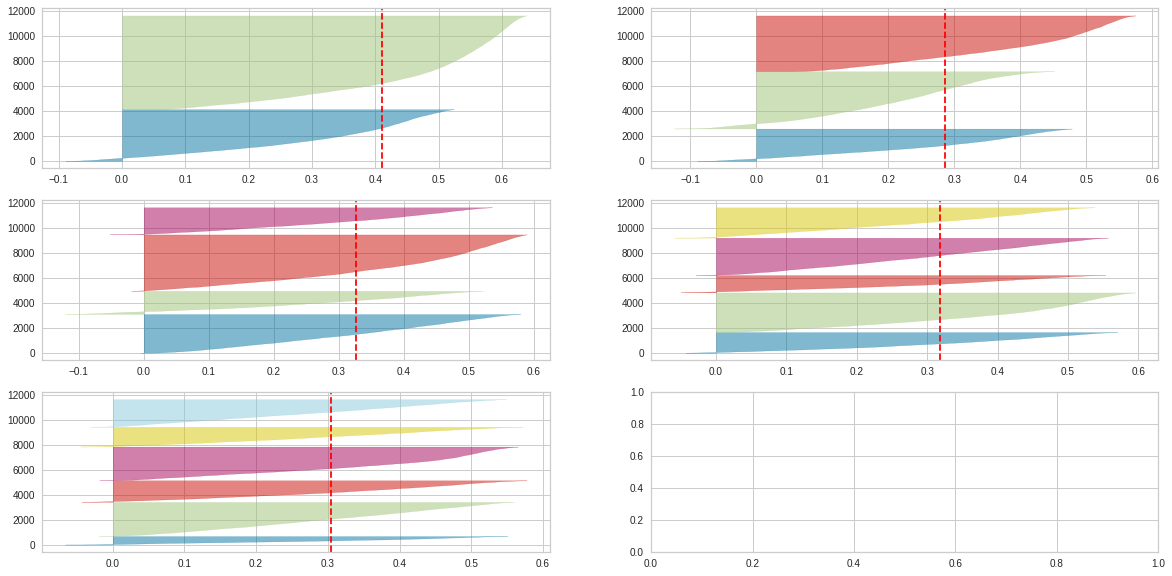

In [ ]:
# Find best K with Silhouette Score Analysis
fig, ax = plt.subplots(3, 2, figsize=(20,10))
silhouette_scores = []
for i in [2, 3, 4, 5, 6]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)

    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)

    cluster_labels = km.fit_predict(X)
    score = silhouette_score(X, km.labels_, metric='euclidean')
    silhouette_scores.append(score)
    print('Silhouette Coefficient dari nilai K = %d adalah %.3f'% (i, score))

print('\nMemilih K = 2 karena nilai Silhouette Coefficient nya yang paling tinggi')

In [ ]:
# Make Clustering with K = 2
kmeans = KMeans(n_clusters=2).fit(X)
cluster_assignment = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
data_with_clusters = pd.DataFrame(X.copy())
data_with_clusters['Clusters'] = cluster_assignment
data_with_clusters

,0,1,2,Clusters
0,-3.439290,1.539628,-0.024508,1
1,1.624011,-0.771590,-2.233948,0
2,-1.227484,2.238951,0.983446,1
3,9.114658,-5.481759,-2.484961,0
4,2.691045,0.623138,-1.046625,0
...,...,...,...,...
11602,6.486036,0.402596,2.265053,0
11603,1.944520,-1.365929,1.700644,0
11604,1.993184,-1.231553,1.329836,0
11605,8.146555,-4.368749,-0.527173,0


In [ ]:
data_with_clusters.Clusters.value_counts()

1    7480
0    4127
Name: Clusters, dtype: int64

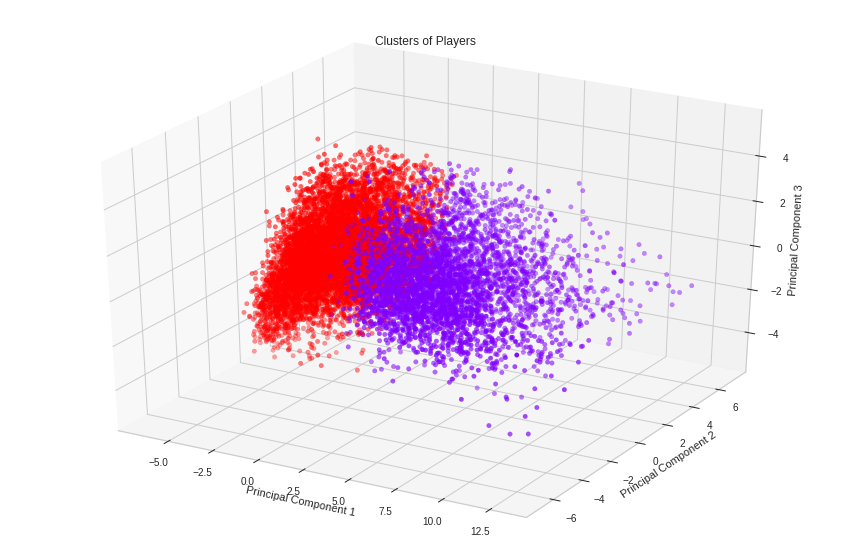

In [ ]:
# Visualisasi Hasil Clustering pada proyeksi 3D

fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")

x = X[:,0]
y = X[:,1]
z = X[:,2]
cluster = data_with_clusters['Clusters']

ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Clusters of Players")
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()

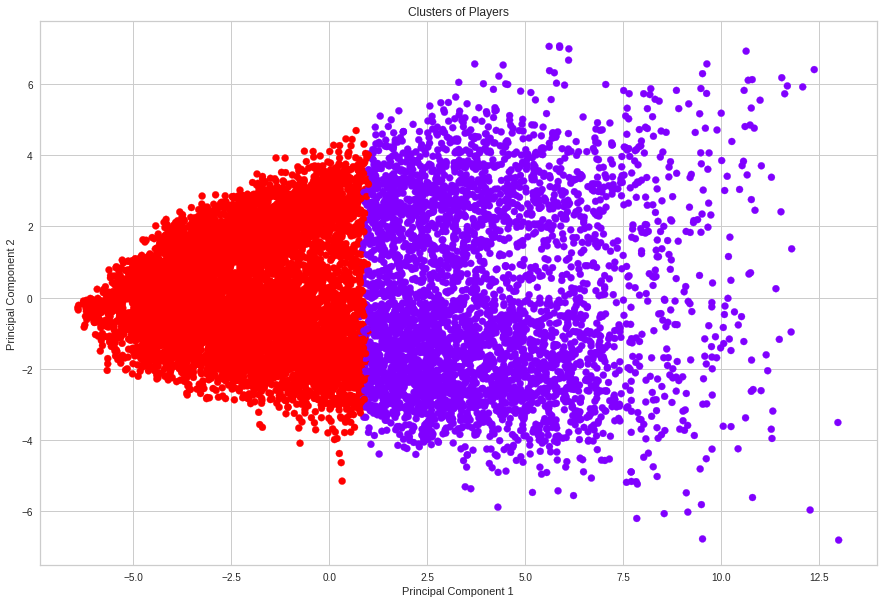

In [ ]:
# Visualisasi Hasil Clustering pada proyeksi 2D (PC 1 dan PC 2)

fig = plt.figure(figsize = (15, 10))
ax = plt.axes()

x = X[:,0]
y = X[:,1]
cluster = data_with_clusters['Clusters']

ax.scatter(x, y, c = cluster, cmap = "rainbow")
plt.title("Clusters of Players")
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

plt.show()

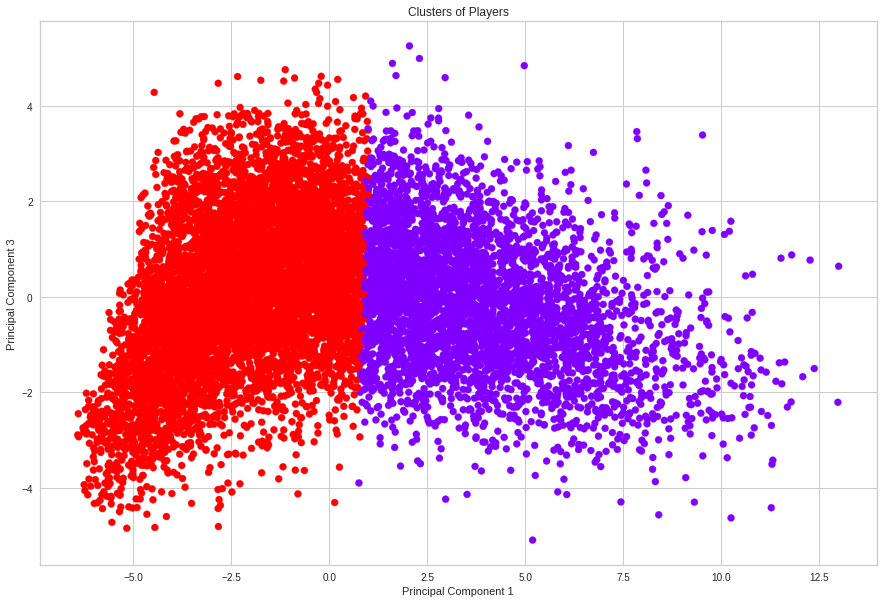

In [ ]:
# Visualisasi Hasil Clustering pada proyeksi 2D (PC 1 dan PC 3)

fig = plt.figure(figsize = (15, 10))
ax = plt.axes()

x = X[:,0]
y = X[:,2]
cluster = data_with_clusters['Clusters']

ax.scatter(x, y, c = cluster, cmap = "rainbow")
plt.title("Clusters of Players")
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 3')

plt.show()

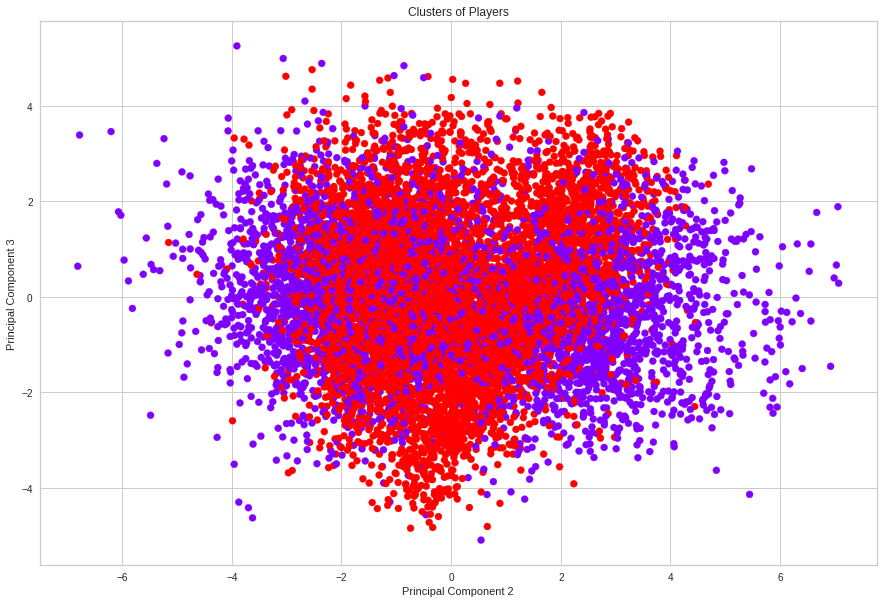

In [ ]:
# Visualisasi Hasil Clustering pada proyeksi 2D (PC 2 dan PC 3)

fig = plt.figure(figsize = (15, 10))
ax = plt.axes()

x = X[:,1]
y = X[:,2]
cluster = data_with_clusters['Clusters']

ax.scatter(x, y, c = cluster, cmap = "rainbow")
plt.title("Clusters of Players")
ax.set_xlabel('Principal Component 2')
ax.set_ylabel('Principal Component 3')

plt.show()

In [ ]:
# Pasangkan kembali hasil Clustering ke data asli
players_df_clusters = players_df_cleaned.copy()
players_df_clusters['Clusters'] = data_with_clusters['Clusters']

# Pisah Cluster menjadi 2 DataFrame berbeda
df2c_c0 = players_df_clusters[players_df_clusters['Clusters'] == 0]
df2c_c1 = players_df_clusters[players_df_clusters['Clusters'] == 1]
print('Cluster 0 shape: ' + str(df2c_c0.shape))
print('Cluster 1 shape: ' + str(df2c_c1.shape))

Cluster 0 shape: (4127, 32)
Cluster 1 shape: (7480, 32)


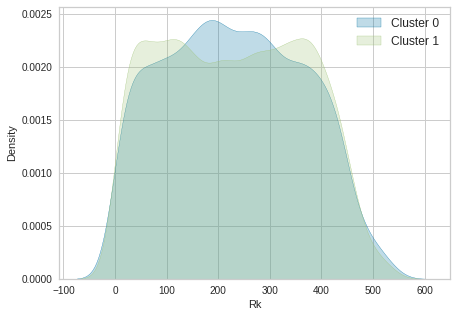

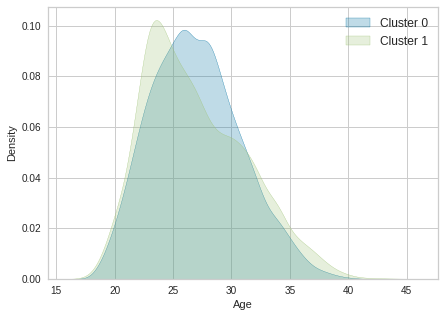

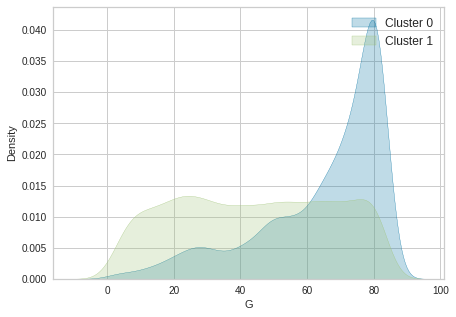

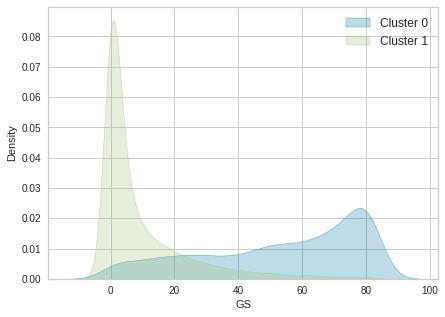

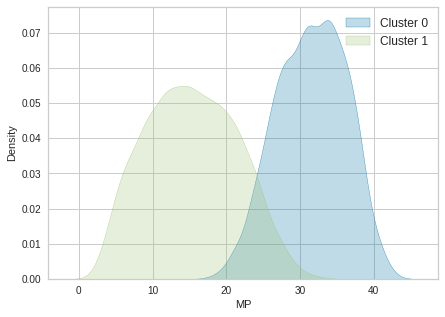

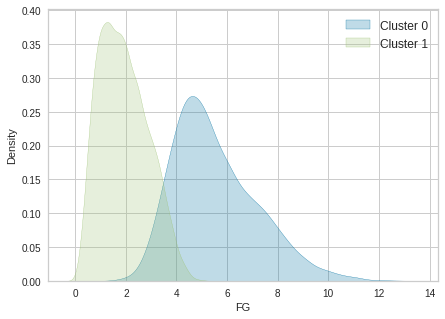

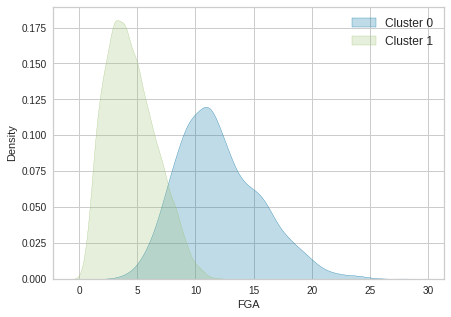

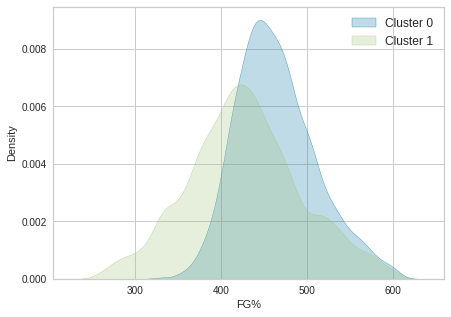

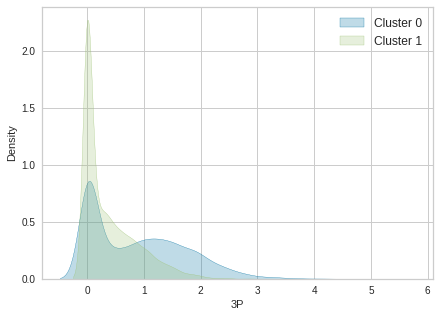

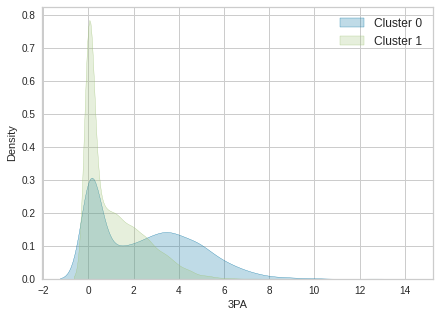

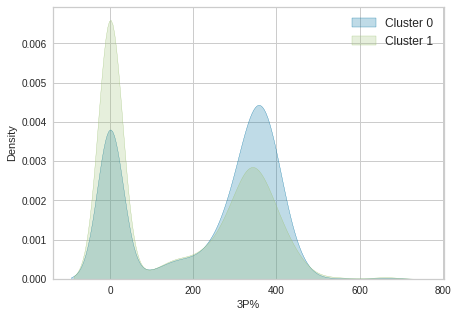

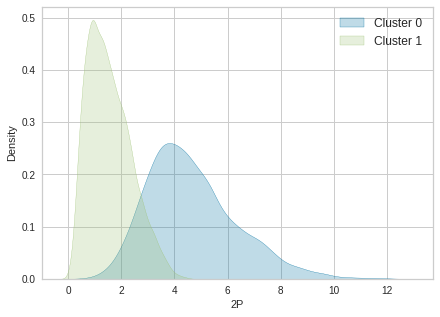

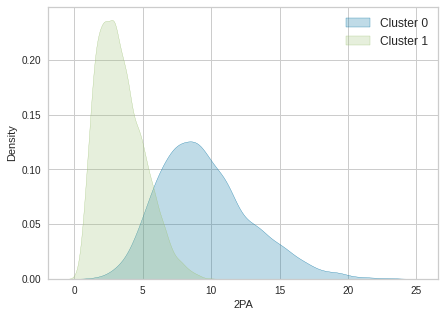

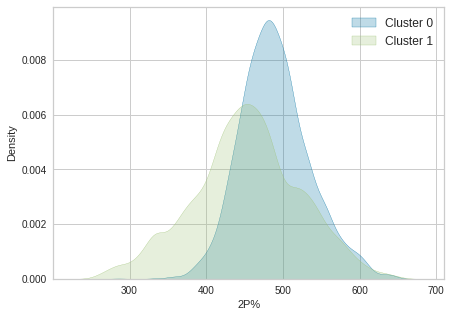

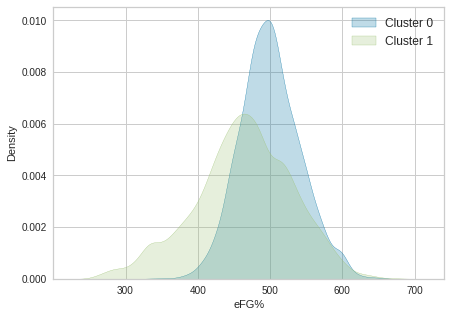

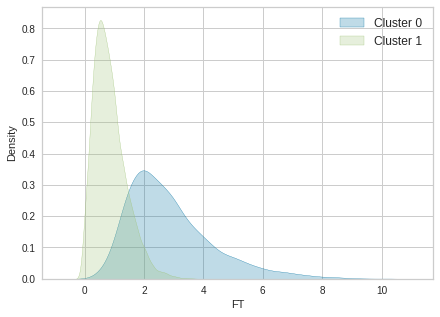

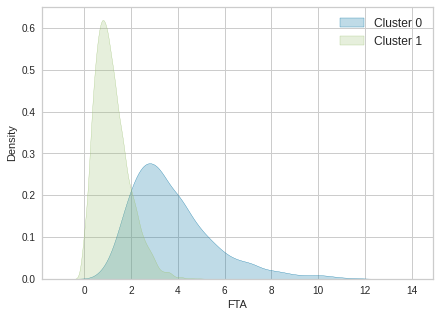

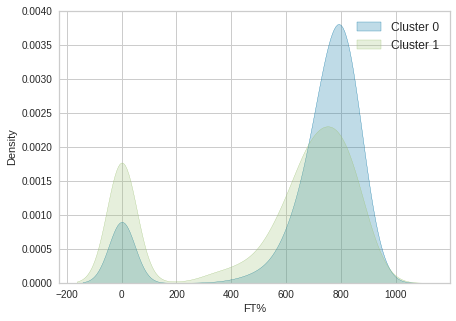

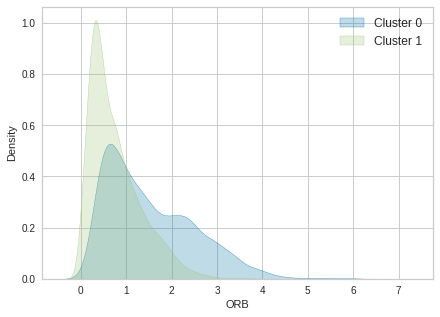

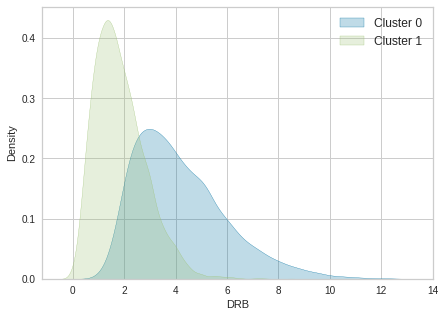

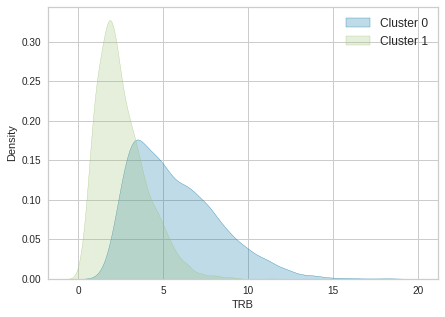

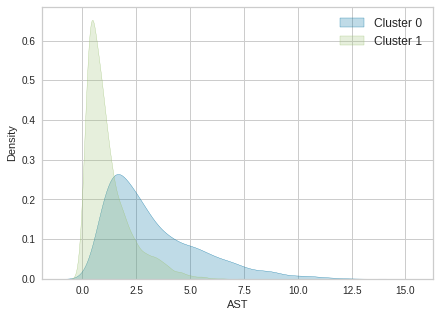

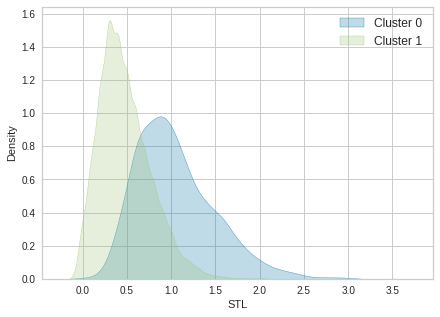

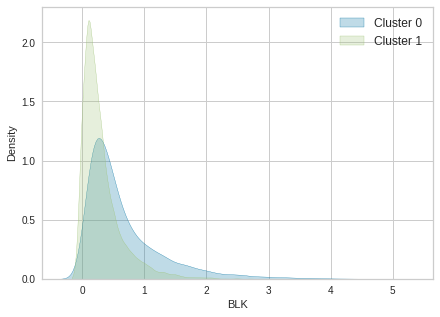

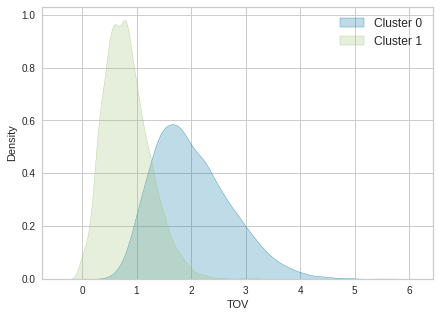

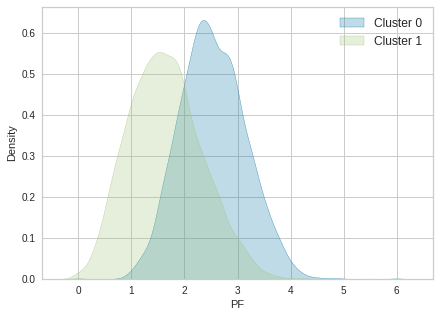

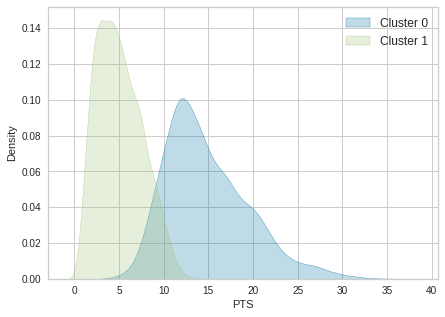

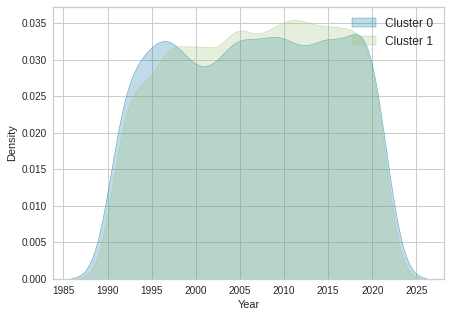

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


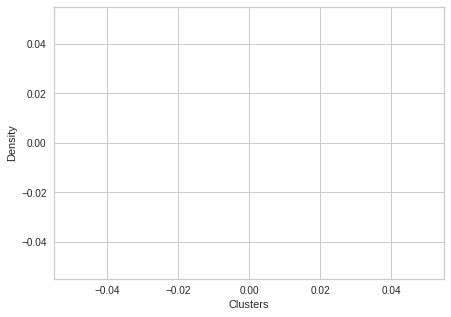

In [ ]:
# Visualisasi persebaran data setiap kolom pada kedua Cluster

for col in df2c_c1.select_dtypes(include=np.number).columns:
  # KDE Plot
  plt.figure(figsize=(7,5))
  sns.kdeplot(df2c_c0[col], shade=True)
  sns.kdeplot(df2c_c1[col], shade=True)
  plt.legend(['Cluster 0','Cluster 1'], fontsize=12)
  plt.show()

###Conclusion

Pada hasil clustering diatas, berdasarkan hasil analisis Silhouette Score terbentuk 2 cluster. Kedua cluster tersebut tidak terlalu memiliki karakteristik yang unik. Namun, berdasarkan visualiasi KDE plot diatas untuk membandingkan persebaran data setiap kolom pada kedua cluster, kami berhasil menemukan beberapa kolom yang dapat dijadikan karakteristik kedua Cluster. Berikut karakteristik kedua cluster yang kami temukan:

1.   Cluster 0 didominasi oleh pemain yang lebih banyak **mencetak poin** dibanding cluster 1.
2.   Cluster 0 didominasi oleh pemain yang lebih banyak memberikan ***2-point score*** dibanding cluster 1
3.   Cluster 0 didominasi oleh pemain yang lebih banyak melakukan ***field goal attempt*** dibanding cluster 1.
4.   Cluster 0 didominasi oleh pemain yang **waktu bermainnya** lebih banyak dibanding cluster 1.

Dari temuan kami diatas, kesimpulan yang kami ambil adalah cluster 0 didominasi oleh pemain tingkat atas sedangkan cluster 1 didominasi oleh pemain tingkat menengah kebawah.

